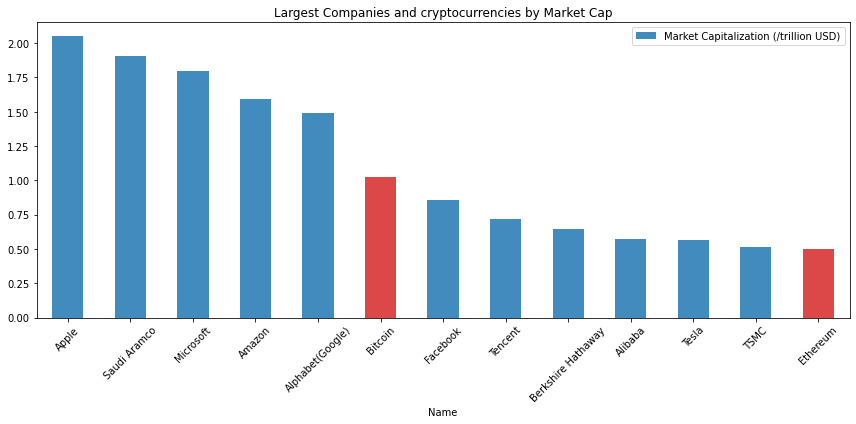

In [75]:
import pandas as pd
import matplotlib.pyplot as plt

market_cap_value = [2.049, 1.909, 1.800, 1.590, 1.488,1.023, 0.857, 0.715, 0.645, 0.576, 0.568, 0.511, 0.501]
market_cap_name = ['Apple', 'Saudi Aramco', 'Microsoft', 'Amazon', 'Alphabet(Google)', 'Bitcoin', 'Facebook', 'Tencent', 'Berkshire Hathaway', 'Alibaba', 'Tesla', 'TSMC','Ethereum']

df = pd.DataFrame({
    'Market Capitalization (/trillion USD)': market_cap_value,
    'Name': market_cap_name
})

df.plot(kind='bar', y = 'Market Capitalization (/trillion USD)', x = 'Name', title = 'Largest Companies and cryptocurrencies by Market Cap', color=['C0','C0','C0','C0','C0','C3','C0','C0','C0','C0','C0','C0','C3'], rot=45, figsize=(12,6), alpha=0.85)

plt.tight_layout()
plt.savefig('output.png')


In [72]:
df[df['Market Capitalization (/trillion USD)'] > 1]

,Market Capitalization (/trillion USD),Name
0,2.049,Apple
1,1.909,Saudi Aramco
2,1.800,Microsoft
3,1.590,Amazon
4,1.488,Alphabet(Google)
5,1.023,Bitcoin


In [86]:
import pandas as pd
import requests
import re
from bs4 import BeautifulSoup

# Create date range for historical snapshots
Date = pd.date_range(start='20130428', end='20130428', freq='7D').strftime('%Y%m%d')

# Retrieve market cap value in dollars
market_cap = []
payload = {'count':10000 }
for date in Date:

    # Retrieve historical snapshot data from date
    page = requests.get('https://pro-api.coinmarketcap.com/v1/global-metrics/quotes/historical')
    soup = BeautifulSoup(page.content, 'html.parser')

    # Extract marketcap value from span
    print(soup)
    market_cap.append(int(re.sub(r',|\$', '', soup.find('span', {'id' : 'total-marketcap'}).text.strip())))

# Create data frame of data
df = pd.DataFrame({'Total Market Cap':market_cap}, index=Date)

# Write data to file
df.to_csv('total_market_cap.csv')

{
    "status": {
        "timestamp": "2021-05-13T07:41:14.658Z",
        "error_code": 1002,
        "error_message": "API key missing.",
        "elapsed": 0,
        "credit_count": 0
    }
}


AttributeError: 'NoneType' object has no attribute 'text'

In [83]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
url = "https://coinmarketcap.com/currencies/ripple/historical-data/?start=20130428&end=20180802"
content = requests.get(url).content
soup = BeautifulSoup(content,'html.parser')
table = soup.find('table', {'class': 'table'})
print()
data = [[td.text.strip() for td in tr.findChildren('td')] for tr in table.findChildren('tr')]
df = pd.DataFrame(data)
df.drop(df.index[0], inplace=True) # first row is empty
df[0] =  pd.to_datetime(df[0]) # date
for i in range(1,7):
    
    df[i] = pd.to_numeric(df[i].str.replace(",","").str.replace("-","")) # some vol is missing and has -
df.columns = ['Date','Open','High','Low','Close','Volume','Market Cap']
df.set_index('Date',inplace=True)
df.sort_index(inplace=True)

None


AttributeError: 'NoneType' object has no attribute 'findChildren'

In [87]:
!curl -H "X-CMC_PRO_API_KEY: e62ff01c-0bb9-4ad1-821c-72459a9bde19" -H "Accept: application/json" -d "convert=USD" -G https://pro-api.coinmarketcap.com/v1/global-metrics/quotes/historical

{
    "status": {
        "timestamp": "2021-05-13T07:54:17.626Z",
        "error_code": 1006,
        "error_message": "Your API Key subscription plan doesn't support this endpoint.",
        "elapsed": 0,
        "credit_count": 0
    }
}

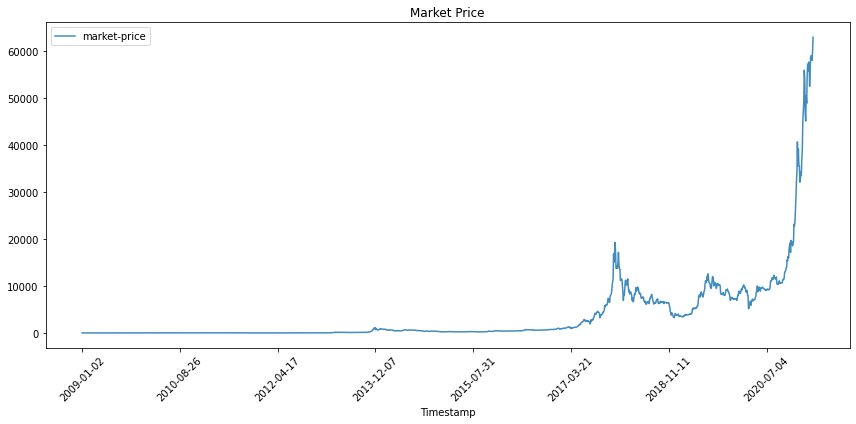

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("trade/market-price")

df_date = df["Timestamp"].str.split(" ")
data = df_date.to_list()
names = ["date", "time"]
new_df = pd.DataFrame(data, columns=names)
df["Timestamp"] = new_df

df.plot(y = 'market-price', x = "Timestamp", title = 'Market Price', rot=45, figsize=(12,6), alpha=0.85)

plt.tight_layout()
plt.savefig('market-price.png')

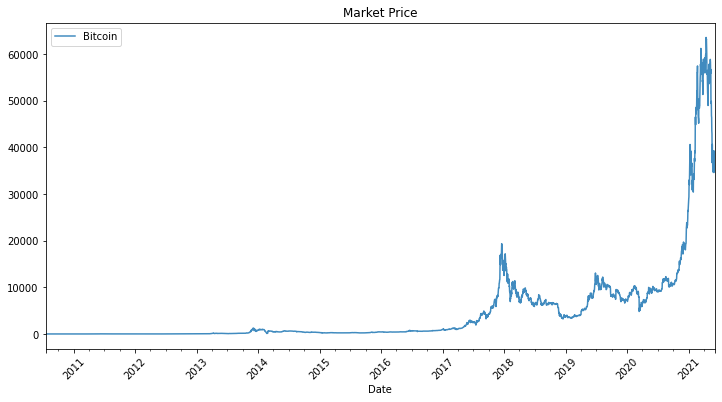

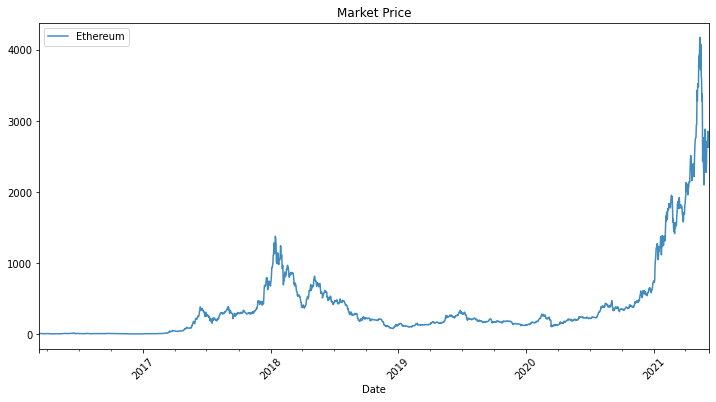

In [73]:
import pandas as pd
import matplotlib.pyplot as plt

df_bitcoin = pd.read_csv("Bitcoin Historical Data - Investing.com.csv")
df_eth = pd.read_csv("Ethereum Historical Data - Investing.com.csv")
df_bitcoin["Date"] =  pd.to_datetime(df_bitcoin["Date"], format='%b %d, %Y')
df_bitcoin["Bitcoin"] = df_bitcoin["Open"].str.replace(",","").astype(float)

df_eth["Date"] =  pd.to_datetime(df_eth["Date"], format='%b %d, %Y')
df_eth["Ethereum"] = df_eth["Open"].str.replace(",","").astype(float)

df_bitcoin.plot(y = 'Bitcoin', x="Date", title = 'Market Price', rot=45, figsize=(12,6), alpha=0.85)
df_eth.plot(y = 'Ethereum', x="Date", title = 'Market Price', rot=45, figsize=(12,6), alpha=0.85)

#plt.tight_layout()
plt.savefig('market-price.png')

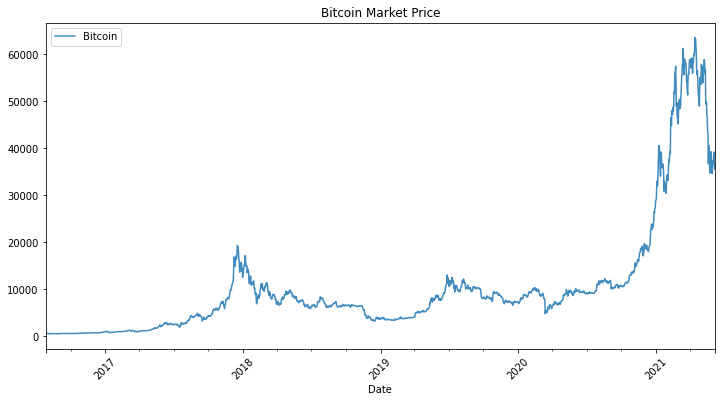

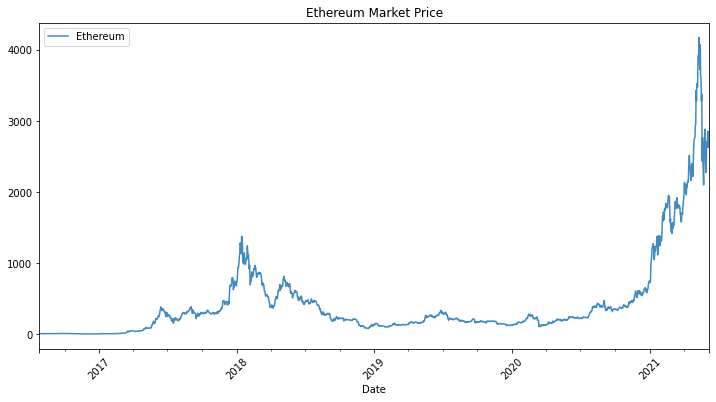

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker    

df_bitcoin = pd.read_csv("Bitcoin Historical Data - Investing.com.csv")
df_eth = pd.read_csv("Ethereum Historical Data - Investing.com.csv")
df_bitcoin["Date"] =  pd.to_datetime(df_bitcoin["Date"], format='%b %d, %Y')
df_bitcoin["Bitcoin"] = df_bitcoin["Open"].str.replace(",","").astype(float)

df_eth["Date"] =  pd.to_datetime(df_eth["Date"], format='%b %d, %Y')
df_eth["Ethereum"] = df_eth["Open"].str.replace(",","").astype(float)

df_bitcoin = df_bitcoin.set_index("Date")
df_eth = df_eth.set_index("Date")

df_crypto = pd.concat([df_bitcoin, df_eth["Ethereum"]], axis=1)[2200:]

df_crypto.plot(y = 'Bitcoin', title = 'Bitcoin Market Price', rot=45, figsize=(12,6), alpha=0.85)

plt.savefig('Bitcoin market-price.png')

df_crypto.plot(y = 'Ethereum', title = 'Ethereum Market Price', rot=45, figsize=(12,6), alpha=0.85)

plt.savefig('Ethereum market-price.png')

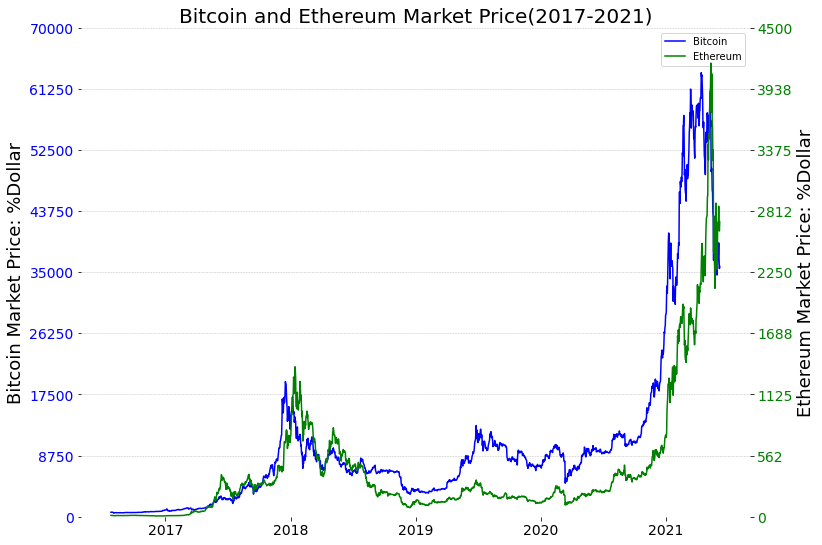

In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


fig, ax1 = plt.subplots(figsize=(12,9))
title = ('Bitcoin and Ethereum Market Price(2016-2021)')
plt.title(title,fontsize=20)
plt.grid(axis='y',color='grey',linestyle='--',lw=0.5,alpha=0.5)
plt.tick_params(axis='both',labelsize=14)
plot1 = ax1.plot(df_crypto.index,df_crypto["Bitcoin"],'b',label='Bitcoin')
ax1.set_ylabel('Bitcoin Market Price: %Dollar', fontsize = 18)
ax1.set_ylim(0,70000)
for tl in ax1.get_yticklabels():
    tl.set_color('b')    
ax2 = ax1.twinx()
plot2 = ax2.plot(df_crypto.index,df_crypto["Ethereum"],'g',label='Ethereum')
ax2.set_ylabel('Ethereum Market Price: %Dollar',fontsize=18)
ax2.set_ylim(0,4500)
ax2.tick_params(axis='y',labelsize=14)
for tl in ax2.get_yticklabels():
    tl.set_color('g')                    
#ax2.set_xlim(2016,2022)
lines = plot1 + plot2           
ax1.legend(lines,[l.get_label() for l in lines])    
ax1.set_yticks(np.linspace(ax1.get_ybound()[0],ax1.get_ybound()[1],9)) 
ax2.set_yticks(np.linspace(ax2.get_ybound()[0],ax2.get_ybound()[1],9)) 
for ax in [ax1,ax2]:
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)                       
plt.savefig("Bitcoin and Ethereum Market Price(2016-2021)")

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


fig, ax1 = plt.subplots(figsize=(12,9))
title = ('Bitcoin and Ethereum Market Price(2016-2021)')
plt.title(title,fontsize=20)
plt.grid(axis='y',color='grey',linestyle='--',lw=0.5,alpha=0.5)
plt.tick_params(axis='both',labelsize=14)
plot1 = ax1.plot(df_crypto.index,df_crypto["Bitcoin"],'b',label='Bitcoin')
ax1.set_ylabel('Bitcoin Market Price: %Dollar', fontsize = 18)
ax1.set_ylim(0,70000)
for tl in ax1.get_yticklabels():
    tl.set_color('b')    
ax2 = ax1.twinx()
plot2 = ax2.plot(df_crypto.index,df_crypto["Ethereum"],'g',label='Ethereum')
ax2.set_ylabel('Ethereum Market Price: %Dollar',fontsize=18)
ax2.set_ylim(0,4500)
ax2.tick_params(axis='y',labelsize=14)
for tl in ax2.get_yticklabels():
    tl.set_color('g')                    
#ax2.set_xlim(2016,2022)
lines = plot1 + plot2           
ax1.legend(lines,[l.get_label() for l in lines])    
ax1.set_yticks(np.linspace(ax1.get_ybound()[0],ax1.get_ybound()[1],9)) 
ax2.set_yticks(np.linspace(ax2.get_ybound()[0],ax2.get_ybound()[1],9)) 
for ax in [ax1,ax2]:
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)                       
plt.savefig("Bitcoin and Ethereum Market Price(2016-2021)")

ValueError: Unable to parse string "1,079.9" at position 1228

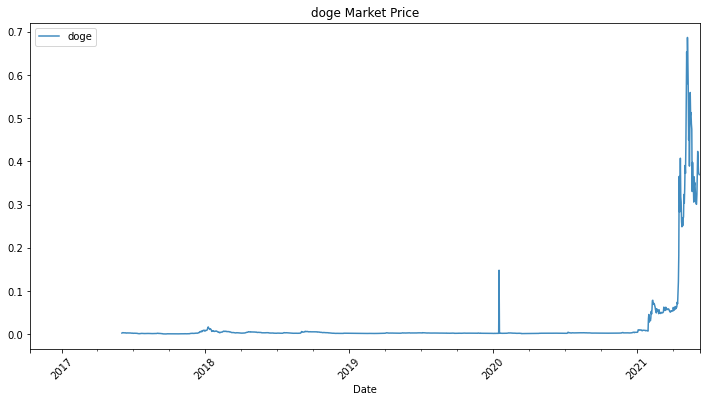

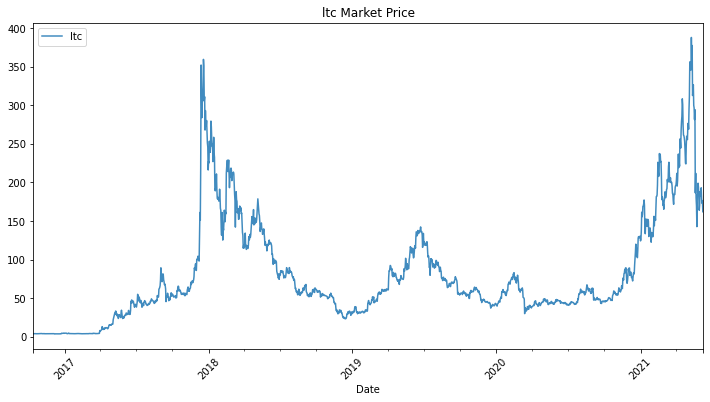

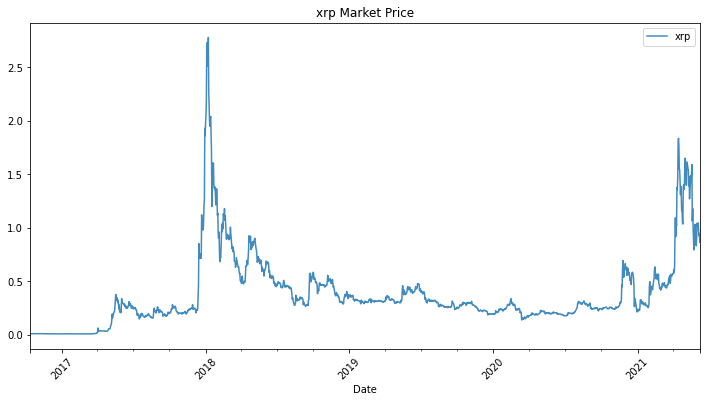

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker    

df_doge = pd.read_csv("Dogecoin Historical Data.csv")
df_ltc = pd.read_csv("Litecoin Historical Data.csv")
df_xrp = pd.read_csv("XRP Historical Data.csv")

df_doge["Date"] =  pd.to_datetime(df_doge["Date"], format='%b %d, %Y')
df_doge["doge"] = df_doge["Open"]

df_ltc["Date"] =  pd.to_datetime(df_ltc["Date"], format='%b %d, %Y')
df_ltc["ltc"] = df_ltc["Open"]

df_xrp["Date"] =  pd.to_datetime(df_xrp["Date"], format='%b %d, %Y')
df_xrp["xrp"] = df_xrp["Open"]

df_doge = df_doge.set_index("Date")
df_ltc = df_ltc.set_index("Date")

df_xrp = df_xrp.set_index("Date")

df_crypto = pd.concat([df_doge, df_ltc["ltc"], df_xrp["xrp"]], axis=1)[-1700:]

df_crypto.plot(y = 'doge', title = 'doge Market Price', rot=45, figsize=(12,6), alpha=0.85)

plt.savefig('doge market-price.png')

df_crypto.plot(y = 'ltc', title = 'ltc Market Price', rot=45, figsize=(12,6), alpha=0.85)

plt.savefig('ltc market-price.png')

df_crypto.plot(y = 'xrp', title = 'xrp Market Price', rot=45, figsize=(12,6), alpha=0.85)

plt.savefig('xrp market-price.png')

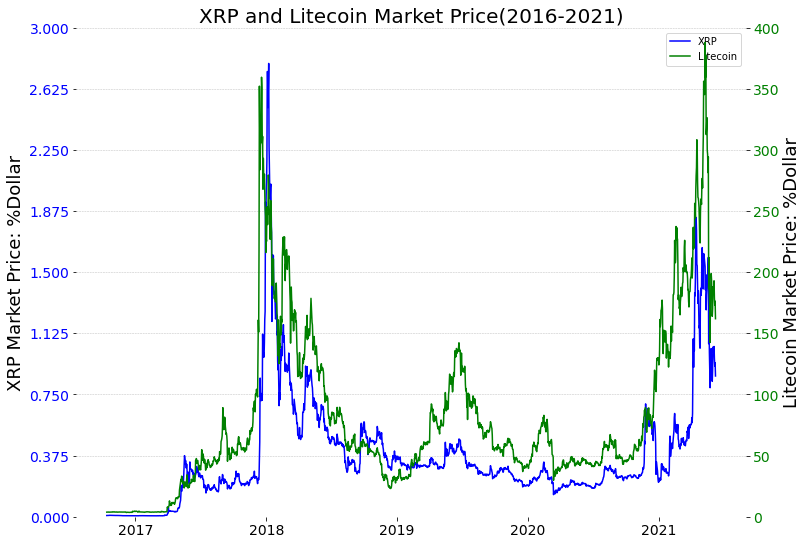

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


fig, ax1 = plt.subplots(figsize=(12,9))
title = ('XRP and Litecoin Market Price(2016-2021)')
plt.title(title,fontsize=20)
plt.grid(axis='y',color='grey',linestyle='--',lw=0.5,alpha=0.5)
plt.tick_params(axis='both',labelsize=14)
plot1 = ax1.plot(df_crypto.index,df_crypto["xrp"],'b',label='XRP')
ax1.set_ylabel('XRP Market Price: %Dollar', fontsize = 18)
ax1.set_ylim(0,3)
for tl in ax1.get_yticklabels():
    tl.set_color('b')    
ax2 = ax1.twinx()
plot2 = ax2.plot(df_crypto.index,df_crypto["ltc"],'g',label='Litecoin')
ax2.set_ylabel('Litecoin Market Price: %Dollar',fontsize=18)
ax2.set_ylim(0,400)
ax2.tick_params(axis='y',labelsize=14)
for tl in ax2.get_yticklabels():
    tl.set_color('g')                    
#ax2.set_xlim(2016,2022)
lines = plot1 + plot2           
ax1.legend(lines,[l.get_label() for l in lines])    
ax1.set_yticks(np.linspace(ax1.get_ybound()[0],ax1.get_ybound()[1],9)) 
ax2.set_yticks(np.linspace(ax2.get_ybound()[0],ax2.get_ybound()[1],9)) 
for ax in [ax1,ax2]:
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)                       
plt.savefig("XRP and Litecoin Market Price(2016-2021)")

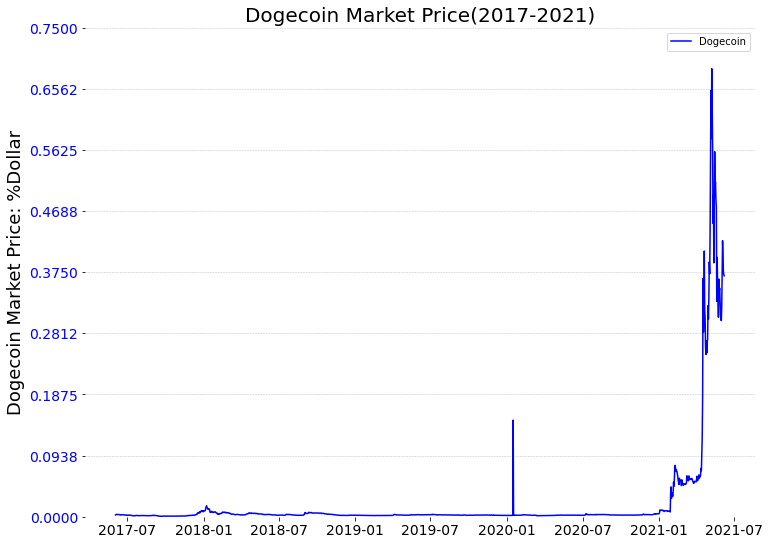

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


fig, ax1 = plt.subplots(figsize=(12,9))
title = ('Dogecoin Market Price(2017-2021)')
plt.title(title,fontsize=20)
plt.grid(axis='y',color='grey',linestyle='--',lw=0.5,alpha=0.5)
plt.tick_params(axis='both',labelsize=14)
plot1 = ax1.plot(df_crypto.index,df_crypto["doge"],'b',label='Dogecoin')
ax1.set_ylabel('Dogecoin Market Price: %Dollar', fontsize = 18)
ax1.set_ylim(0,0.75)
for tl in ax1.get_yticklabels():
    tl.set_color('b')    

lines = plot1          
ax1.legend(lines,[l.get_label() for l in lines])    
ax1.set_yticks(np.linspace(ax1.get_ybound()[0],ax1.get_ybound()[1],9)) 
ax2.set_yticks(np.linspace(ax2.get_ybound()[0],ax2.get_ybound()[1],9)) 
for ax in [ax1]:
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)                       
plt.savefig("Dogecoin Market Price(2017-2021)")

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker    

df_doge = pd.read_csv("Dogecoin Historical Data.csv")
df_ltc = pd.read_csv("Litecoin Historical Data.csv")
df_xrp = pd.read_csv("XRP Historical Data.csv")
df_bitcoin = pd.read_csv("Bitcoin Historical Data - Investing.com.csv")
df_eth = pd.read_csv("Ethereum Historical Data - Investing.com.csv")

df_bitcoin["Date"] =  pd.to_datetime(df_bitcoin["Date"], format='%b %d, %Y')
df_bitcoin["Bitcoin"] = df_bitcoin["Open"].str.replace(",","").astype(float)

df_eth["Date"] =  pd.to_datetime(df_eth["Date"], format='%b %d, %Y')
df_eth["Ethereum"] = df_eth["Open"].str.replace(",","").astype(float)

df_bitcoin = df_bitcoin.set_index("Date")
df_eth = df_eth.set_index("Date")

df_doge["Date"] =  pd.to_datetime(df_doge["Date"], format='%b %d, %Y')
df_doge["DOGE"] = df_doge["Open"]

df_ltc["Date"] =  pd.to_datetime(df_ltc["Date"], format='%b %d, %Y')
df_ltc["LTC"] = df_ltc["Open"]

df_xrp["Date"] =  pd.to_datetime(df_xrp["Date"], format='%b %d, %Y')
df_xrp["XRP"] = df_xrp["Open"]

df_doge = df_doge.set_index("Date")
df_ltc = df_ltc.set_index("Date")
df_xrp = df_xrp.set_index("Date")

df_crypto = pd.concat([df_bitcoin, df_eth["Ethereum"], df_ltc["LTC"], df_xrp["XRP"], df_doge["DOGE"]], axis=1)[-1700:]
df_crypto_2017 = df_crypto.loc['2017-01-01':'2017-12-31', "Bitcoin":"DOGE"]
df_crypto_2020 = df_crypto.loc['2020-01-01':'2020-12-31', "Bitcoin":"DOGE"]

In [57]:
from sklearn.metrics.cluster import normalized_mutual_info_score
normalized_mutual_info_score(df_crypto_2017["Bitcoin"], df_crypto_2017["Ethereum"])

/root/tools/Python-3.7.7/py37/lib/python3.7/site-packages/sklearn/metrics/cluster/_supervised.py:58: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)


0.9954733424274884

In [58]:
normalized_mutual_info_score(df_crypto_2017["Bitcoin"], df_crypto_2017["LTC"])

/root/tools/Python-3.7.7/py37/lib/python3.7/site-packages/sklearn/metrics/cluster/_supervised.py:58: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)


0.9828121068782382

In [59]:
normalized_mutual_info_score(df_crypto_2017["Bitcoin"], df_crypto_2017["XRP"])

/root/tools/Python-3.7.7/py37/lib/python3.7/site-packages/sklearn/metrics/cluster/_supervised.py:58: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)


0.9810137520770563

In [69]:
current_bitcoin_price = df_crypto["Bitcoin"].shift(periods = 1).loc['2017-01-01':'2017-12-31']
print(current_bitcoin_price)
normalized_mutual_info_score(df_crypto_2017["Bitcoin"], current_bitcoin_price)

Date
2017-01-01      959.0
2017-01-02      963.4
2017-01-03      995.4
2017-01-04     1017.0
2017-01-05     1033.3
               ...   
2017-12-27    13830.2
2017-12-28    15757.0
2017-12-29    15416.3
2017-12-30    14398.5
2017-12-31    14392.1
Freq: D, Name: Bitcoin, Length: 365, dtype: float64


/root/tools/Python-3.7.7/py37/lib/python3.7/site-packages/sklearn/metrics/cluster/_supervised.py:58: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)


0.9980650090639941

In [68]:
df_crypto_2017["Bitcoin"]

Date
2017-01-01      963.4
2017-01-02      995.4
2017-01-03     1017.0
2017-01-04     1033.3
2017-01-05     1135.4
               ...   
2017-12-27    15757.0
2017-12-28    15416.3
2017-12-29    14398.5
2017-12-30    14392.1
2017-12-31    12532.4
Freq: D, Name: Bitcoin, Length: 365, dtype: float64

In [73]:
transaction_amount = pd.read_csv("/root/study/ChainMT/thesis figure/trade/n-transactions")
transaction_amount["Timestamp"] = pd.to_datetime(transaction_amount["Timestamp"]).dt.date
transaction_amount

,Timestamp,n-transactions
0,2009-01-16,109
1,2009-01-19,115
2,2009-01-22,86
3,2009-01-25,97
4,2009-01-28,122
...,...,...
1486,2021-04-02,305788
1487,2021-04-05,289046
1488,2021-04-08,278534
1489,2021-04-11,253449


# compare the data between 2017 and 2020


     totaltx_2017  totaltx_2020
0        204354.0        295567
1        290396.0        316517
2        303381.0        287215
3        344424.0        287779
4        304519.0        299146
..            ...           ...
361      298345.0        308983
362      353859.0        336311
363      350328.0        338258
364      262815.0        344918
365           NaN        258080

[366 rows x 2 columns]


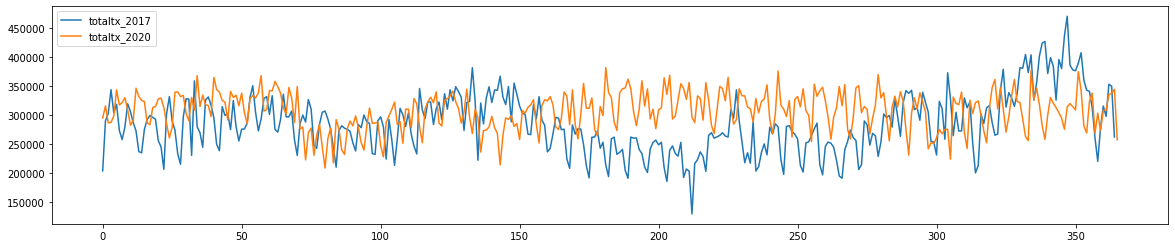

In [25]:
# compare the data between 2017 and 2020
import pandas as pd
occ_2020_input_data = "trade/n-transactions_3y"
occ_2017_input_data = "trade/OccChainletsInTime.txt"

price_data_2017_input_path = "pricedBitcoin2009-2018.csv"
betti_0_input_path = "betti_0(100).csv"
betti_1_input_path = "betti_1(100).csv"
def read_csv(file_path, file_path_2):
    total_tx = pd.read_csv(file_path, sep="\t")
    data_2017_all = total_tx[total_tx['year']==2017]
    data_2017_total_tx = data_2017_all.loc[:, ['day', 'totaltx']].rename(columns={'totaltx': 'totaltx_2017'})
    data_2017_total_tx = data_2017_total_tx['totaltx_2017'].reset_index(drop=True)
    
    total_tx = pd.read_csv(file_path_2, sep=",")
    data_2020_all = total_tx[total_tx['Timestamp'].str.contains("2020")]
    data_2020_total_tx = data_2020_all.loc[:, ['n-transactions']].rename(columns={'n-transactions': 'totaltx_2020'})
    data_2020_total_tx = data_2020_total_tx['totaltx_2020'].reset_index(drop=True)
    
    data_compare = pd.concat([data_2017_total_tx, data_2020_total_tx], axis=1)
    print(data_compare)
    plot_save = data_compare.plot.line(figsize=(20,4))
    plot_save.figure.savefig('totaltx_2017_2020.png')
    
read_csv(occ_2017_input_data,occ_2020_input_data)


            date  price  year  day  totaltx
0  6/1/2011 0:00   9.57  2011  152     6464
1  6/2/2011 0:00  10.60  2011  153     7632
2  6/3/2011 0:00  14.29  2011  154     8502
3  6/4/2011 0:00  18.89  2011  155     8766
4  6/5/2011 0:00  16.70  2011  156     8675
                 date        price  year  day  totaltx
2039    1/1/2017 0:00    997.69000  2017    1   204354
2040    1/2/2017 0:00   1018.05000  2017    2   290396
2041    1/3/2017 0:00   1030.82000  2017    3   303381
2042    1/4/2017 0:00   1129.87000  2017    4   344424
2043    1/5/2017 0:00   1005.81000  2017    5   304519
...               ...          ...   ...  ...      ...
2399  12/27/2017 0:00  15589.32167  2017  361   316216
2400  12/28/2017 0:00  14380.58167  2017  362   298345
2401  12/29/2017 0:00  14640.14000  2017  363   353859
2402  12/30/2017 0:00  13215.57400  2017  364   350328
2403  12/31/2017 0:00  14165.57500  2017  365   262815

[365 rows x 5 columns]
           price
0      997.69000
1     1018.05000
2

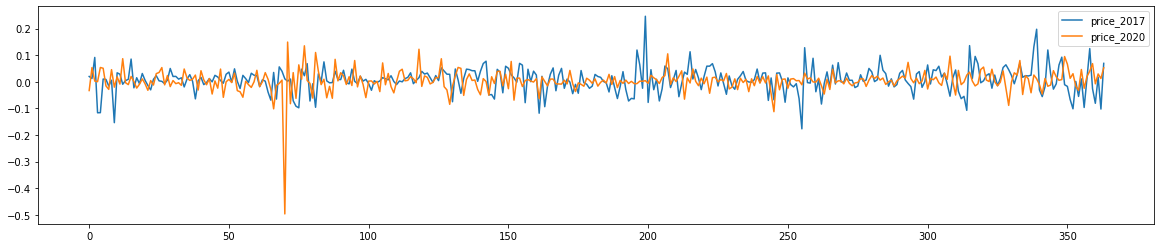

In [37]:
# compare the data between 2017 and 2020
import pandas as pd
import numpy as np
occ_2020_input_data = "trade/n-transactions_3y"
occ_2017_input_data = "trade/OccChainletsInTime.txt"

price_2017_input_path = "trade/pricedBitcoin2009-2018.csv"
price_2020_input_path = "trade/market-price"

betti_0_input_path = "betti_0(100).csv"
betti_1_input_path = "betti_1(100).csv"
def read_csv(file_path, file_path_2):
    total_tx = pd.read_csv(file_path)
    print(total_tx.head())
    data_2017_all = total_tx[total_tx['year']==2017]
    print(data_2017_all)
    data_2017_total_tx = data_2017_all.loc[:, ['price']].reset_index(drop=True)
    data_2017_total_tx_log = []
    print(data_2017_total_tx)
    for i in range(1, 365):
        log_return = np.log(data_2017_total_tx.loc[i,'price']/data_2017_total_tx.loc[i-1,'price'])
        data_2017_total_tx_log.append(log_return)
    data_2017_total_tx_log = pd.DataFrame(data_2017_total_tx_log,columns=['price_2017'])
        
    total_tx = pd.read_csv(file_path_2, sep=",")
    data_2020_all = total_tx[total_tx['Timestamp'].str.contains("2020")]
    data_2020_total_tx = data_2020_all.loc[:, ['market-price']].rename(columns={'market-price': 'price_2020'})
    data_2020_total_tx = data_2020_total_tx['price_2020'].reset_index(drop=True)
    data_2020_total_tx_log = []
    print(data_2020_total_tx)
    for i in range(1, 365):
        log_return = np.log(data_2020_total_tx[i]/data_2020_total_tx[i-1])
        data_2020_total_tx_log.append(log_return)
    data_2020_total_tx_log = pd.DataFrame(data_2020_total_tx_log,columns=['price_2020'])
    
    data_compare = pd.concat([data_2017_total_tx_log, data_2020_total_tx_log], axis=1)
    print(data_compare)
    plot_save = data_compare.plot.line(figsize=(20,4))
    plot_save.figure.savefig('price_2017_2020.png')
    
read_csv(price_2017_input_path,price_2020_input_path)


    V1   V2   V3   V4  V5  V6  V7  V8  V9  V10  ...  V92  V93  V94  V95  V96  \
1  293  243  166   93  45  32  16   7   4    4  ...    1    1    1    1    1   
2  318  276  181   85  37  21  17   8   6    3  ...    1    1    1    1    1   
3  338  288  208  105  60  33  15  10   6    5  ...    1    1    1    1    1   
4  350  323  248  145  80  40  16  10   6    3  ...    1    1    1    1    1   
5  322  298  239  137  75  43  23  14   6    4  ...    1    1    1    1    1   

   V97  V98  V99  V100  V101  
1    1    1    1     1     1  
2    1    1    1     1     1  
3    1    1    1     1     1  
4    1    1    1     1     1  
5    1    1    1     1     1  

[5 rows x 101 columns]
1       9.871287
2      10.346535
3      11.524752
4      12.990099
5      12.415842
         ...    
361    12.613861
362    12.554455
363    12.910891
364    12.207921
365    12.019802
Length: 365, dtype: float64
                0      1      2      3     4     5     6     7     8     9  \
2020-01-01  250.

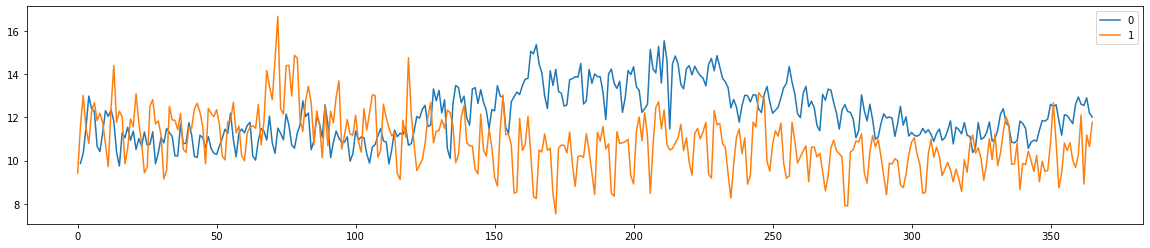

In [47]:
betti0_2017_input_path = "trade/betti_0(100).csv"
betti0_2020_input_path = "/root/study/ChainMT/data/combination/betti/betti_0/betti_0.csv"

def read_csv(file_path,file_path_2):
    betti_1 = pd.read_csv(file_path, index_col=0)
    print(betti_1.head())
    betti_1 = betti_1.mean(axis=1)
    print(betti_1)

    betti_1_2020 = pd.read_csv(file_path_2, index_col=0)
    print(betti_1_2020.head())
    betti_1_2020 = betti_1_2020.mean(axis=1).reset_index(drop=True)
    print(betti_1_2020)
    
    data_compare = pd.concat([betti_1, betti_1_2020], axis=1)
    print(data_compare)
    plot_save = data_compare.plot.line(figsize=(20,4))
    plot_save.figure.savefig('betti_0.jpg')

read_csv(betti0_2017_input_path,betti0_2020_input_path)

     V1    V2    V3    V4    V5    V6     V7     V8     V9    V10  ...    V92  \
1  5671  5824  6092  6833  8069  9676  11535  13498  15504  17747  ...  79401   
2  3321  3690  4287  4837  5931  7509   9128  11140  13204  15501  ...  79401   
3  1891  2049  2287  2716  3662  4953   6754   8521  10674  12943  ...  79401   
4  1225  1330  1442  1756  2346  3338   4725   6317   8087  10076  ...  79401   
5  3003  3084  3215  3467  4180  4920   6052   7377   9054  10799  ...  79401   

     V93    V94    V95    V96    V97    V98    V99   V100   V101  
1  79401  79401  79401  79401  79401  79401  79401  79401  79401  
2  79401  79401  79401  79401  79401  79401  79401  79401  79401  
3  79401  79401  79401  79401  79401  79401  79401  79401  79401  
4  79401  79401  79401  79401  79401  79401  79401  79401  79401  
5  79401  79401  79401  79401  79401  79401  79401  79401  79401  

[5 rows x 101 columns]
1      64492.732673
2      63939.574257
3      63442.168317
4      61907.455446
5      

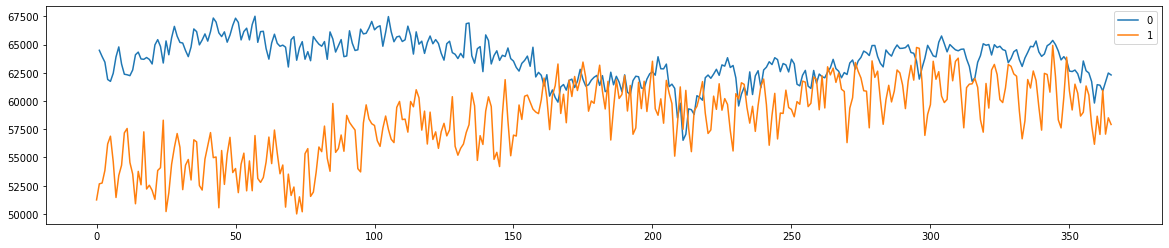

In [44]:
betti1_2017_input_path = "trade/betti_1(100).csv"
betti1_2020_input_path = "/root/study/ChainMT/data/combination/betti/betti_1/betti_1.csv"

def read_csv(file_path,file_path_2):
    betti_1 = pd.read_csv(file_path, index_col=0)
    print(betti_1.head())
    betti_1 = betti_1.mean(axis=1)
    print(betti_1)

    betti_1_2020 = pd.read_csv(file_path_2, index_col=0)
    print(betti_1_2020.head())
    betti_1_2020 = betti_1_2020.mean(axis=1).reset_index(drop=True)
    print(betti_1_2020)
    
    data_compare = pd.concat([betti_1, betti_1_2020], axis=1)
    print(data_compare)
    plot_save = data_compare.plot.line(figsize=(20,4))
    plot_save.figure.savefig('betti_1.jpg')

read_csv(betti1_2017_input_path,betti1_2020_input_path)

0       7175.68
1       6944.33
2       7326.35
3       7347.89
4       7351.57
         ...   
361    26246.58
362    27036.69
363    27376.37
364    28856.59
365    28982.56
Name: price_2020, Length: 366, dtype: float64


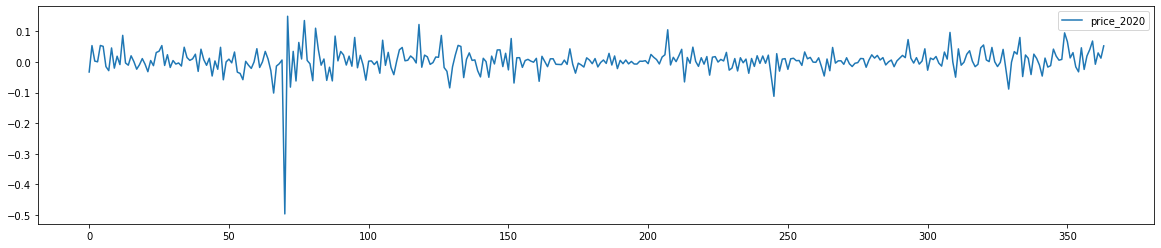

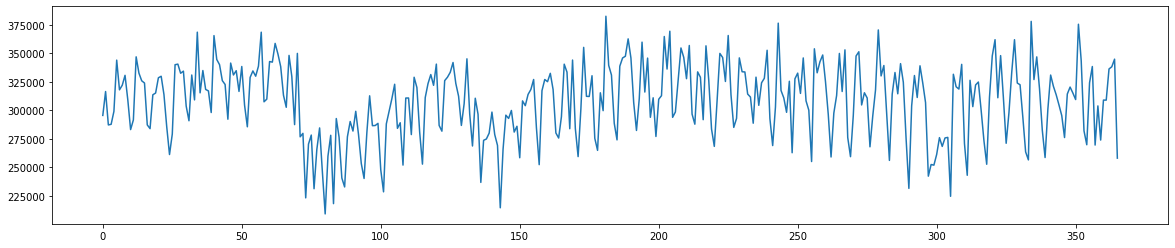

In [52]:
# compare the data between 2017 and 2020
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
occ_2020_input_data = "trade/n-transactions_3y"
occ_2017_input_data = "trade/OccChainletsInTime.txt"

price_2017_input_path = "trade/pricedBitcoin2009-2018.csv"
price_2020_input_path = "trade/market-price"

betti_0_input_path = "betti_0(100).csv"
betti_1_input_path = "betti_1(100).csv"
def read_csv(file_path, file_path_2):
    total_tx = pd.read_csv(file_path, sep=",")
    data_2020_all = total_tx[total_tx['Timestamp'].str.contains("2020")]
    data_2020_total_tx = data_2020_all.loc[:, ['market-price']].rename(columns={'market-price': 'price_2020'})
    data_2020_total_tx = data_2020_total_tx['price_2020'].reset_index(drop=True)
    data_2020_total_tx_log = []
    print(data_2020_total_tx)
    for i in range(1, 365):
        log_return = np.log(data_2020_total_tx[i]/data_2020_total_tx[i-1])
        data_2020_total_tx_log.append(log_return)
    data_2020_total_tx_log = pd.DataFrame(data_2020_total_tx_log,columns=['price_2020'])
    data_2020_total_tx_log.plot.line(figsize=(20,4))
    plt.show()
    
    total_tx = pd.read_csv(file_path_2, sep=",")
    data_2020_all = total_tx[total_tx['Timestamp'].str.contains("2020")]
    data_2020_total_tx = data_2020_all.loc[:, ['n-transactions']].rename(columns={'n-transactions': 'totaltx_2020'})
    data_2020_total_tx = data_2020_total_tx['totaltx_2020'].reset_index(drop=True)
    data_2020_total_tx.plot.line(figsize=(20,4))

    
read_csv(price_2020_input_path,occ_2020_input_data)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


fig, ax1 = plt.subplots(figsize=(12,9))
title = ('price')
plt.title(title,fontsize=20)
plt.grid(axis='y',color='grey',linestyle='--',lw=0.5,alpha=0.5)
plt.tick_params(axis='both',labelsize=14)
plot1 = ax1.plot(df_crypto.index,df_crypto["xrp"],'b',label='XRP')
ax1.set_ylabel('XRP Market Price: %Dollar', fontsize = 18)
ax1.set_ylim(0,3)
for tl in ax1.get_yticklabels():
    tl.set_color('b')    
ax2 = ax1.twinx()
plot2 = ax2.plot(df_crypto.index,df_crypto["ltc"],'g',label='Litecoin')
ax2.set_ylabel('Litecoin Market Price: %Dollar',fontsize=18)
ax2.set_ylim(0,400)
ax2.tick_params(axis='y',labelsize=14)
for tl in ax2.get_yticklabels():
    tl.set_color('g')                    
#ax2.set_xlim(2016,2022)
lines = plot1 + plot2           
ax1.legend(lines,[l.get_label() for l in lines])    
ax1.set_yticks(np.linspace(ax1.get_ybound()[0],ax1.get_ybound()[1],9)) 
ax2.set_yticks(np.linspace(ax2.get_ybound()[0],ax2.get_ybound()[1],9)) 
for ax in [ax1,ax2]:
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)                       
plt.savefig("XRP and Litecoin Market Price(2016-2021)")

                0      1      2      3     4     5     6     7     8     9  \
2020-01-01  250.0  193.0  121.0   84.0  59.0  41.0  30.0  22.0  12.0   9.0   
2020-01-02  282.0  235.0  172.0  126.0  87.0  61.0  37.0  26.0  18.0  13.0   
2020-01-03  297.0  260.0  180.0  133.0  94.0  70.0  53.0  37.0  29.0  21.0   
2020-01-04  269.0  207.0  138.0   95.0  68.0  51.0  39.0  33.0  29.0  25.0   
2020-01-05  272.0  216.0  132.0   92.0  64.0  40.0  32.0  23.0  18.0  14.0   

            ...   92   93   94   95   96   97   98   99  100  101  
2020-01-01  ...  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  
2020-01-02  ...  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  
2020-01-03  ...  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  
2020-01-04  ...  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  
2020-01-05  ...  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  

[5 rows x 102 columns]
2020-01-01     9.421569
2020-01-02    11.598039
2020-01-03    13.019608
2020-01-04    11.509804
202

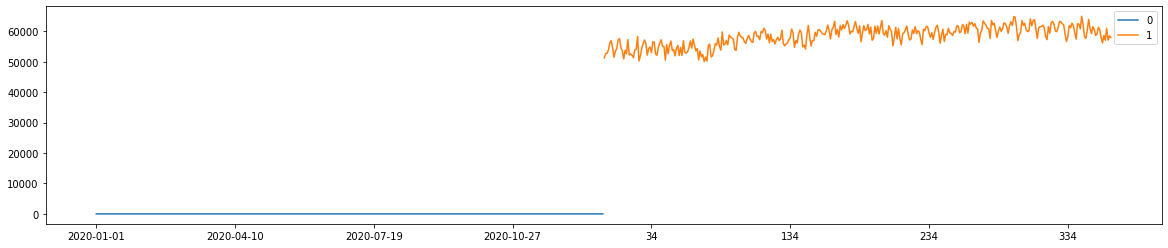

In [54]:
betti0_2020_input_path = "/root/study/ChainMT/data/combination/betti/betti_0/betti_0.csv"
betti1_2020_input_path = "/root/study/ChainMT/data/combination/betti/betti_1/betti_1.csv"

def read_csv(file_path,file_path_2):
    betti_1 = pd.read_csv(file_path, index_col=0)
    print(betti_1.head())
    betti_1 = betti_1.mean(axis=1)
    print(betti_1)

    betti_1_2020 = pd.read_csv(file_path_2, index_col=0)
    print(betti_1_2020.head())
    betti_1_2020 = betti_1_2020.mean(axis=1).reset_index(drop=True)
    print(betti_1_2020)
    
    data_compare = pd.concat([betti_1, betti_1_2020], axis=1)
    print(data_compare)
    plot_save = data_compare.plot.line(figsize=(20,4))
    plot_save.figure.savefig('betti_0_1.jpg')

read_csv(betti0_2020_input_path,betti1_2020_input_path)

In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

betti0_2020_input_path = "/root/study/ChainMT/data/combination/betti/betti_0/betti_0.csv"
betti1_2020_input_path = "/root/study/ChainMT/data/combination/betti/betti_1/betti_1.csv"

betti_0_2020 = pd.read_csv(betti0_2020_input_path, index_col=0)
betti_0_2020 = betti_0_2020.mean(axis=1)
print(betti_0_2020)

betti_1_2020 = pd.read_csv(betti1_2020_input_path, index_col=0)
betti_1_2020 = betti_1_2020.mean(axis=1)
print(betti_1_2020)

data_compare = pd.concat([betti_0_2020, betti_1_2020], axis=1).rename(columns={0:"betti0",1:"betti1"}).reset_index(drop=True)
print(data_compare)




2020-01-01     9.421569
2020-01-02    11.598039
2020-01-03    13.019608
2020-01-04    11.509804
2020-01-05    10.794118
                ...    
2020-12-27    12.117647
2020-12-28     8.910891
2020-12-29    11.186275
2020-12-30    10.643564
2020-12-31    11.774510
Length: 366, dtype: float64
2020-01-01    51240.504950
2020-01-02    52661.683168
2020-01-03    52734.287129
2020-01-04    53846.049505
2020-01-05    56200.118812
                  ...     
2020-12-27    57039.247525
2020-12-28    60956.336634
2020-12-29    57066.089109
2020-12-30    58512.346535
2020-12-31    57921.326733
Length: 366, dtype: float64
        betti0        betti1
0     9.421569  51240.504950
1    11.598039  52661.683168
2    13.019608  52734.287129
3    11.509804  53846.049505
4    10.794118  56200.118812
..         ...           ...
361  12.117647  57039.247525
362   8.910891  60956.336634
363  11.186275  57066.089109
364  10.643564  58512.346535
365  11.774510  57921.326733

[366 rows x 2 columns]


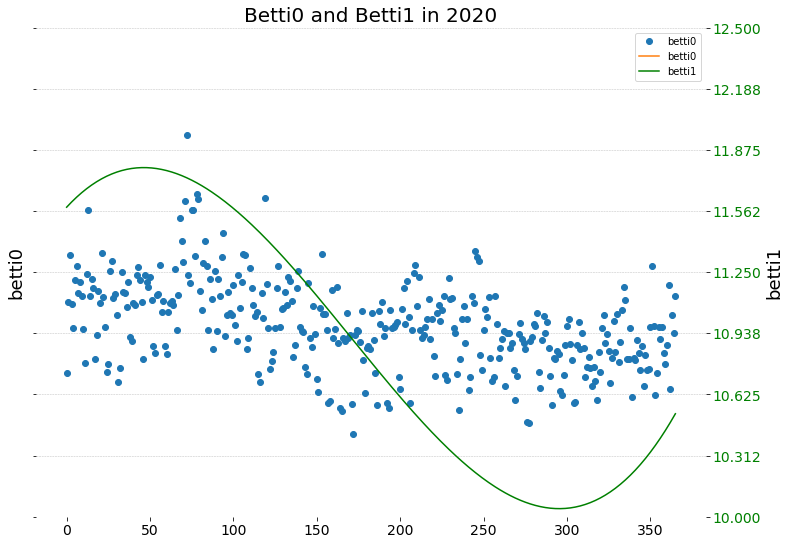

In [127]:
poly = np.polyfit(data_compare.index,data_compare["betti0"], deg=3)
y_value = np.polyval(poly,data_compare.index )

fig, ax1 = plt.subplots(figsize=(12,9))
title = ('Betti0 and Betti1 in 2020')
plt.title(title,fontsize=20)
plt.grid(axis='y',color='grey',linestyle='--',lw=0.5,alpha=0.5)
plt.tick_params(axis='both',labelsize=14)
plot1 = ax1.plot(data_compare.index,data_compare["betti0"],'o','b',label='betti0')
ax1.set_ylabel('betti0', fontsize = 18)
ax1.set_ylim(5,20)
for tl in ax1.get_yticklabels():
    tl.set_color('b')    
ax2 = ax1.twinx()
plot2 = ax2.plot(data_compare.index,y_value,'g',label='betti1')
ax2.set_ylabel('betti1',fontsize=18)
ax2.set_ylim(10,12.5)
ax2.tick_params(axis='y',labelsize=14)
for tl in ax2.get_yticklabels():
    tl.set_color('g')                    
#ax2.set_xlim(2016,2022)
lines = plot1 + plot2           
                       
ax1.legend(lines,[l.get_label() for l in lines])    
ax1.set_yticks(np.linspace(ax1.get_ybound()[0],ax1.get_ybound()[1],9)) 
ax2.set_yticks(np.linspace(ax2.get_ybound()[0],ax2.get_ybound()[1],9)) 
for ax in [ax1,ax2]:
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)                       
plt.savefig("XRP and Litecoin Market Price(2016-2021)")

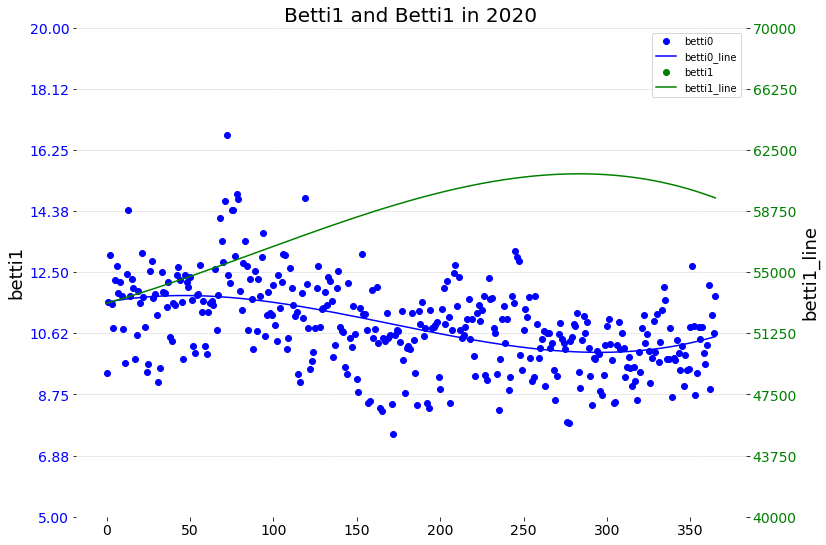

In [134]:
poly = np.polyfit(data_compare.index,data_compare["betti0"], deg=3)
betti0_line = np.polyval(poly,data_compare.index )
poly = np.polyfit(data_compare.index,data_compare["betti1"], deg=3)
betti1_line = np.polyval(poly,data_compare.index )

fig, ax1 = plt.subplots(figsize=(12,9))
title = ('Betti1 and Betti1 in 2020')
plt.title(title,fontsize=20)
plt.grid(axis='y',color='grey',linestyle='--',lw=0.5,alpha=0.5)
plt.tick_params(axis='both',labelsize=14)
plot1 = ax1.plot(data_compare.index,data_compare["betti0"],'o',color='b',label='betti0')
plot2 = ax1.plot(data_compare.index,betti0_line,'b',label='betti0_line')

ax1.set_ylabel('betti1', fontsize = 18)
ax1.set_ylim(5,20)
for tl in ax1.get_yticklabels():
    tl.set_color('b')    
ax2 = ax1.twinx()

plot3 = ax1.plot(data_compare.index,data_compare["betti1"],'o',color='g',label='betti1')
plot4 = ax2.plot(data_compare.index,betti1_line,'g',label='betti1_line')
ax2.set_ylabel('betti1_line',fontsize=18)
ax2.set_ylim(40000,70000)
ax2.tick_params(axis='y',labelsize=14)
for tl in ax2.get_yticklabels():
    tl.set_color('g')                    
#ax2.set_xlim(2016,2022)
lines = plot1 + plot2 +plot3 +plot4           
                       
ax1.legend(lines,[l.get_label() for l in lines])    
ax1.set_yticks(np.linspace(ax1.get_ybound()[0],ax1.get_ybound()[1],9)) 
ax2.set_yticks(np.linspace(ax2.get_ybound()[0],ax2.get_ybound()[1],9)) 
for ax in [ax1,ax2]:
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)                       
plt.savefig("XRP and Litecoin Market Price(2016-2021)")

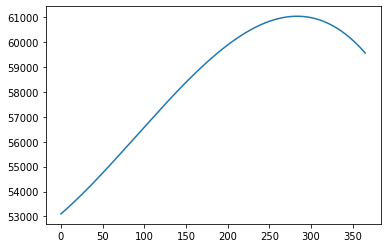

In [123]:
poly = np.polyfit(data_compare.index,data_compare["betti1"], deg=3)
y_value = np.polyval(poly,data_compare.index )
plt.plot(data_compare.index, y_value)

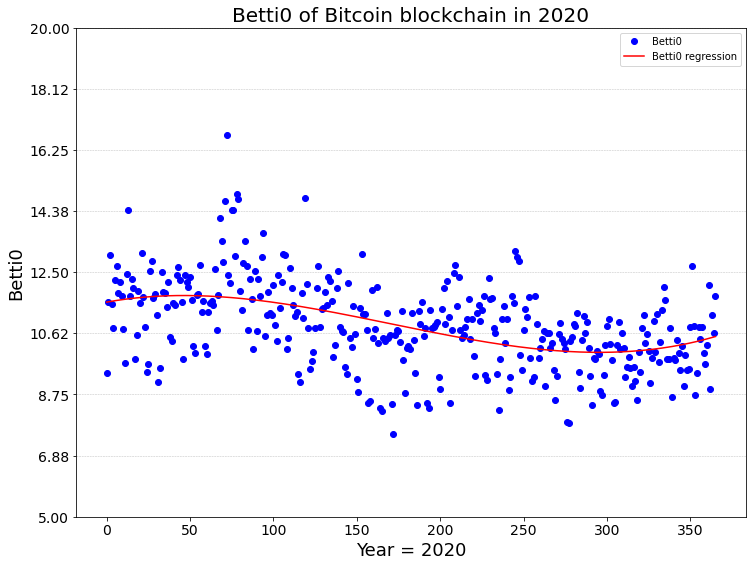

In [180]:
poly = np.polyfit(data_compare.index,data_compare["betti0"], deg=3)
betti0_line = np.polyval(poly,data_compare.index )
poly = np.polyfit(data_compare.index,data_compare["betti1"], deg=3)
betti1_line = np.polyval(poly,data_compare.index )

fig, ax1 = plt.subplots(figsize=(12,9))
title = ('Betti0 of Bitcoin blockchain in 2020')
plt.title(title,fontsize=20)
plt.grid(axis='y',color='grey',linestyle='--',lw=0.5,alpha=0.5)
plt.tick_params(axis='both',labelsize=14)
plot1 = ax1.plot(data_compare.index,data_compare["betti0"],'o',color='b',label='Betti0')
plot2 = ax1.plot(data_compare.index,betti0_line,'r',label='Betti0 regression')

ax1.set_ylabel('Betti0', fontsize = 18)
ax1.set_ylim(5,20)
lines = plot1 + plot2

ax1.set_xlabel('Year = 2020', fontsize = 18)

ax1.legend(lines,[l.get_label() for l in lines])    
ax1.set_yticks(np.linspace(ax1.get_ybound()[0],ax1.get_ybound()[1],9)) 
ax2.set_yticks(np.linspace(ax2.get_ybound()[0],ax2.get_ybound()[1],9)) 

plt.savefig('Betti0 of Bitcoin blockchain in 2020')

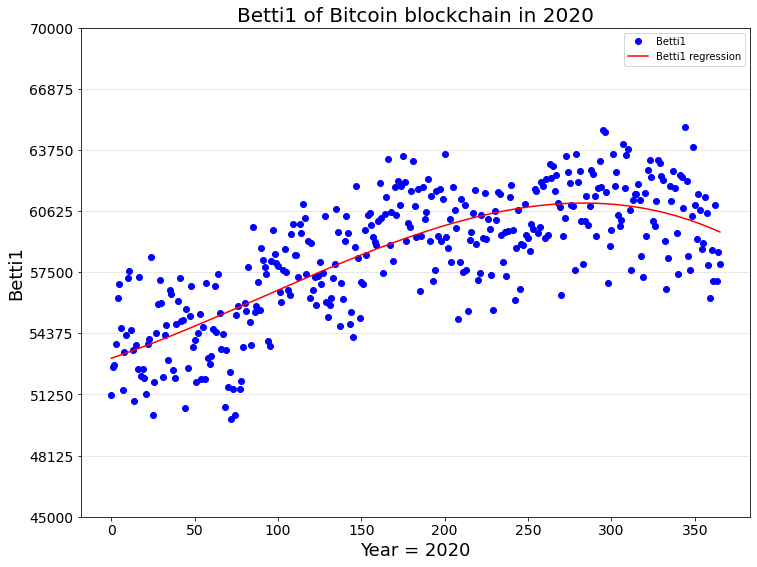

In [179]:
poly = np.polyfit(data_compare.index,data_compare["betti0"], deg=3)
betti0_line = np.polyval(poly,data_compare.index )
poly = np.polyfit(data_compare.index,data_compare["betti1"], deg=3)
betti1_line = np.polyval(poly,data_compare.index )

fig, ax1 = plt.subplots(figsize=(12,9))
title = ('Betti1 of Bitcoin blockchain in 2020')
plt.title(title,fontsize=20)
plt.grid(axis='y',color='grey',linestyle='--',lw=0.5,alpha=0.5)
plt.tick_params(axis='both',labelsize=14)
plot1 = ax1.plot(data_compare.index,data_compare["betti1"],'o',color='b',label='Betti1')
plot2 = ax1.plot(data_compare.index,betti1_line,'r',label='Betti1 regression')

ax1.set_ylabel('Betti1', fontsize = 18)
ax1.set_ylim(45000,70000)
lines = plot1 + plot2

ax1.set_xlabel('Year = 2020', fontsize = 18)

ax1.legend(lines,[l.get_label() for l in lines])    
ax1.set_yticks(np.linspace(ax1.get_ybound()[0],ax1.get_ybound()[1],9)) 
ax2.set_yticks(np.linspace(ax2.get_ybound()[0],ax2.get_ybound()[1],9)) 

plt.savefig('Betti1 of Bitcoin blockchain in 2020')

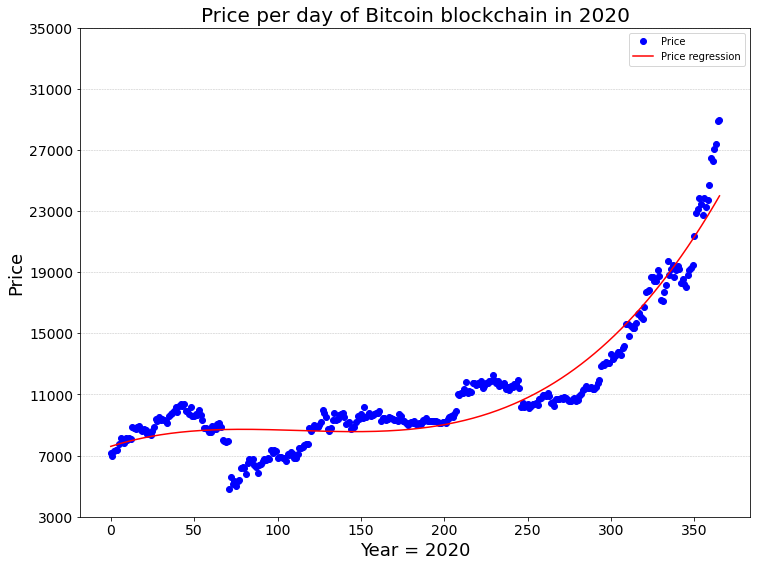

In [175]:
# compare the data between 2017 and 2020
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
occ_2020_input_data = "trade/n-transactions_3y"

price_2020_input_path = "trade/market-price"


total_tx = pd.read_csv(price_2020_input_path, sep=",")
data_2020_all = total_tx[total_tx['Timestamp'].str.contains("2020")]
data_2020_total_tx = data_2020_all.loc[:, ['market-price']].rename(columns={'market-price': 'price_2020'})
data_2020_total_tx = data_2020_total_tx['price_2020'].reset_index(drop=True)

poly = np.polyfit(data_2020_total_tx.index,data_2020_total_tx, deg=3)
data_2020_total_tx_line = np.polyval(poly,data_2020_total_tx.index )

fig, ax1 = plt.subplots(figsize=(12,9))
title = ('Price per day of Bitcoin blockchain in 2020')
plt.title(title,fontsize=20)
plt.grid(axis='y',color='grey',linestyle='--',lw=0.5,alpha=0.5)
plt.tick_params(axis='both',labelsize=14)
plot1 = ax1.plot(data_2020_total_tx.index,data_2020_total_tx,'o',color='b',label='Price')
plot2 = ax1.plot(data_2020_total_tx.index,data_2020_total_tx_line,'r',label='Price regression')

ax1.set_ylabel('Price', fontsize = 18)
ax1.set_ylim(3000,35000)
lines = plot1 + plot2

ax1.set_ylabel('Price', fontsize = 18)
ax1.set_xlabel('Year = 2020', fontsize = 18)

ax1.legend(lines,[l.get_label() for l in lines])    
ax1.set_yticks(np.linspace(ax1.get_ybound()[0],ax1.get_ybound()[1],9)) 
ax2.set_yticks(np.linspace(ax2.get_ybound()[0],ax2.get_ybound()[1],9)) 

plt.savefig('Price per day of Bitcoin blockchain in 2020')

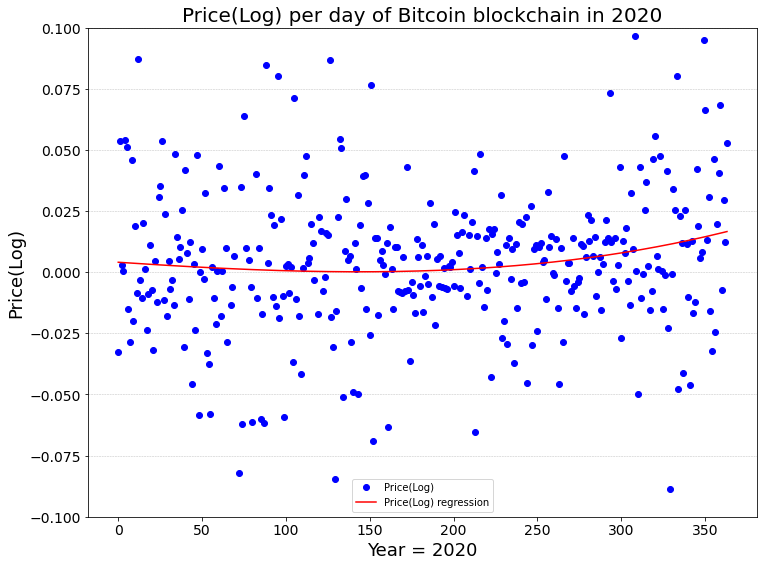

In [171]:
total_tx = pd.read_csv(price_2020_input_path, sep=",")
data_2020_all = total_tx[total_tx['Timestamp'].str.contains("2020")]
data_2020_total_tx = data_2020_all.loc[:, ['market-price']].rename(columns={'market-price': 'price_2020'})
data_2020_total_tx = data_2020_total_tx['price_2020'].reset_index(drop=True)
data_2020_total_tx_log = []
for i in range(1, 365):
    log_return = np.log(data_2020_total_tx[i]/data_2020_total_tx[i-1])
    data_2020_total_tx_log.append(log_return)
data_2020_total_tx = pd.DataFrame(data_2020_total_tx_log,columns=['price_2020'])

poly = np.polyfit(data_2020_total_tx.index,data_2020_total_tx, deg=3)
data_2020_total_tx_line = np.polyval(poly,data_2020_total_tx.index )

fig, ax1 = plt.subplots(figsize=(12,9))
title = ('Price(Log) per day of Bitcoin blockchain in 2020')
plt.title(title,fontsize=20)
plt.grid(axis='y',color='grey',linestyle='--',lw=0.5,alpha=0.5)
plt.tick_params(axis='both',labelsize=14)
plot1 = ax1.plot(data_2020_total_tx.index,data_2020_total_tx,'o',color='b',label='Price(Log)')
plot2 = ax1.plot(data_2020_total_tx.index,data_2020_total_tx_line,'r',label='Price(Log) regression')

ax1.set_ylabel('Price(Log)', fontsize = 18)
ax1.set_ylim(-0.1,0.1)
lines = plot1 + plot2

ax1.set_ylabel('Price(Log)', fontsize = 18)
ax1.set_xlabel('Year = 2020', fontsize = 18)

ax1.legend(lines,[l.get_label() for l in lines])    
ax1.set_yticks(np.linspace(ax1.get_ybound()[0],ax1.get_ybound()[1],9)) 
ax2.set_yticks(np.linspace(ax2.get_ybound()[0],ax2.get_ybound()[1],9)) 

plt.savefig('Price(Log) per day of Bitcoin blockchain in 2020')

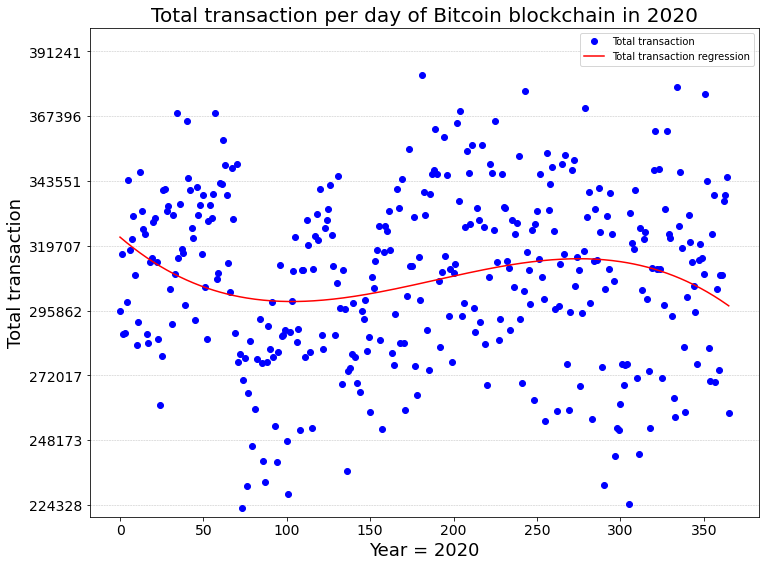

In [170]:
total_tx = pd.read_csv(occ_2020_input_data, sep=",")
data_2020_all = total_tx[total_tx['Timestamp'].str.contains("2020")]
data_2020_total_tx = data_2020_all.loc[:, ['n-transactions']].rename(columns={'n-transactions': 'totaltx_2020'})
data_2020_total_tx = data_2020_total_tx['totaltx_2020'].reset_index(drop=True)

poly = np.polyfit(data_2020_total_tx.index,data_2020_total_tx, deg=3)
data_2020_total_tx_line = np.polyval(poly,data_2020_total_tx.index )

fig, ax1 = plt.subplots(figsize=(12,9))
title = ('Total transaction per day of Bitcoin blockchain in 2020')
plt.title(title,fontsize=20)
plt.grid(axis='y',color='grey',linestyle='--',lw=0.5,alpha=0.5)
plt.tick_params(axis='both',labelsize=14)
plot1 = ax1.plot(data_2020_total_tx.index,data_2020_total_tx,'o',color='b',label='Total transaction')
plot2 = ax1.plot(data_2020_total_tx.index,data_2020_total_tx_line,'r',label='Total transaction regression')

ax1.set_ylabel('Total transaction', fontsize = 18)
ax1.set_xlabel('Year = 2020', fontsize = 18)

ax1.legend(lines,[l.get_label() for l in lines])    
ax1.set_yticks(np.linspace(ax1.get_ybound()[0],ax1.get_ybound()[1],9)) 
ax2.set_yticks(np.linspace(ax2.get_ybound()[0],ax2.get_ybound()[1],9)) 

ax1.set_ylim(220000,400000)
lines = plot1 + plot2

plt.savefig('Total transaction per day of Bitcoin blockchain in 2020')

Index(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04', '2020-01-05',
       '2020-01-06', '2020-01-07', '2020-01-08', '2020-01-09', '2020-01-10',
       ...
       '2020-12-21', '2020-12-22', '2020-12-23', '2020-12-24', '2020-12-25',
       '2020-12-26', '2020-12-27', '2020-12-28', '2020-12-29', '2020-12-30'],
      dtype='object', length=365)
0       7175.68
1       6944.33
2       7326.35
3       7347.89
4       7351.57
         ...   
361    26246.58
362    27036.69
363    27376.37
364    28856.59
365    28982.56
Name: price_2020, Length: 366, dtype: float64


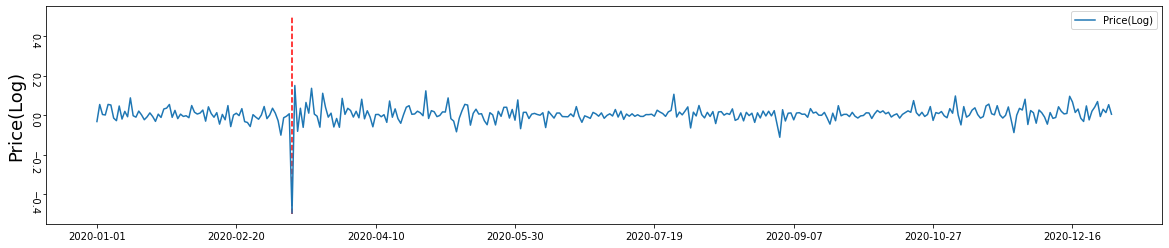

In [229]:
# compare the data between 2017 and 2020
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
occ_2020_input_data = "trade/n-transactions_3y"
price_2020_input_path = "trade/market-price"

betti0_2020_input_path = "/root/study/ChainMT/data/combination/betti/betti_0/betti_0.csv"
betti1_2020_input_path = "/root/study/ChainMT/data/combination/betti/betti_1/betti_1.csv"

total_tx = pd.read_csv(price_2020_input_path, sep=",")
betti_0 = pd.read_csv(betti0_2020_input_path, index_col=0)

data_2020_all = total_tx[total_tx['Timestamp'].str.contains("2020")]
index_2020 = betti_0.index[0:365]
print(index_2020)
data_2020_total_tx = data_2020_all.loc[:, ['market-price']].rename(columns={'market-price': 'price_2020'})
data_2020_total_tx = data_2020_total_tx['price_2020'].reset_index(drop=True)
data_2020_total_tx_log = []
print(data_2020_total_tx)
for i in range(1, 366):
    log_return = np.log(data_2020_total_tx[i]/data_2020_total_tx[i-1])
    data_2020_total_tx_log.append(log_return)
data_2020_total_tx_log = pd.DataFrame(data_2020_total_tx_log,columns=['Price(Log)'], index=index_2020)
ax = data_2020_total_tx_log.plot.line(figsize=(20,4))
ax.set_ylabel('Price(Log)', fontsize = 18)
plt.yticks(rotation=270)
plt.vlines(70,-0.5,0.5,colors = "r", linestyles = "dashed")
plt.savefig('Price(Log) per day in 2020')




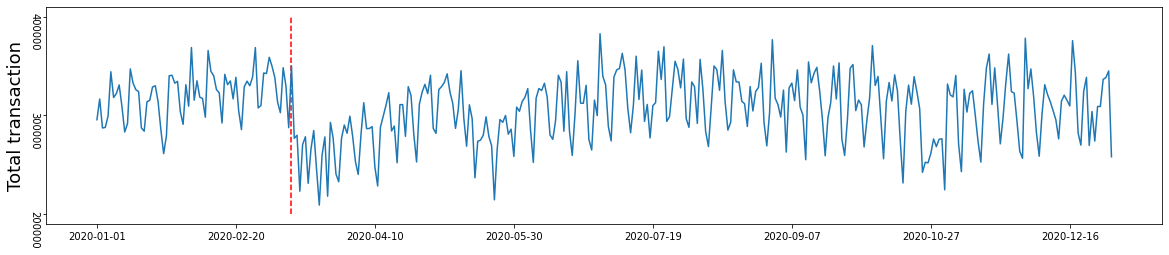

In [226]:
total_tx = pd.read_csv(occ_2020_input_data, sep=",")
data_2020_all = total_tx[total_tx['Timestamp'].str.contains("2020")]
data_2020_total_tx = data_2020_all.loc[:, ['n-transactions']].rename(columns={'n-transactions': 'totaltx_2020'}).set_index(betti_0.index,drop=True)
data_2020_total_tx = data_2020_total_tx['totaltx_2020']
ax2 = data_2020_total_tx.plot.line(figsize=(20,4))
ax2.set_ylabel('Total transaction', fontsize = 18)
plt.yticks([400000,300000, 200000],rotation=270)
plt.vlines(70,200000,400000,colors = "r", linestyles = "dashed")

plt.savefig('Total transaction per day in 2020')



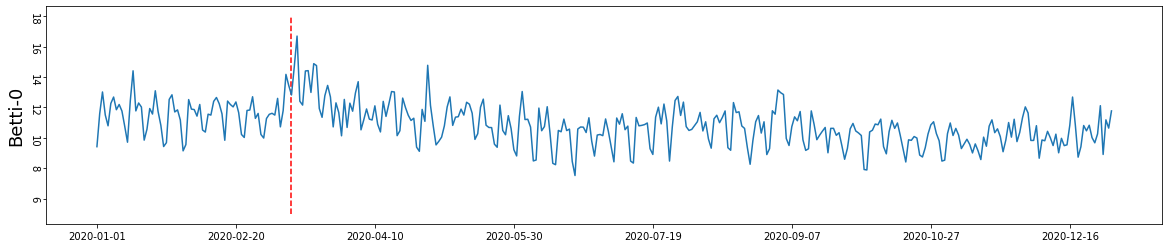

In [227]:
betti_0 = pd.read_csv(betti0_2020_input_path, index_col=0)
betti_0 = betti_0.mean(axis=1)
#print(betti_0)
ax3 = betti_0.plot.line(figsize=(20,4))
ax3.set_ylabel('Betti-0', fontsize = 18)
#plt.yticks([400000,300000, 200000],rotation=270)
plt.yticks(rotation=270)
plt.vlines(70,5,18,colors = "r", linestyles = "dashed")

plt.savefig('Betti-0 per day in 2020')


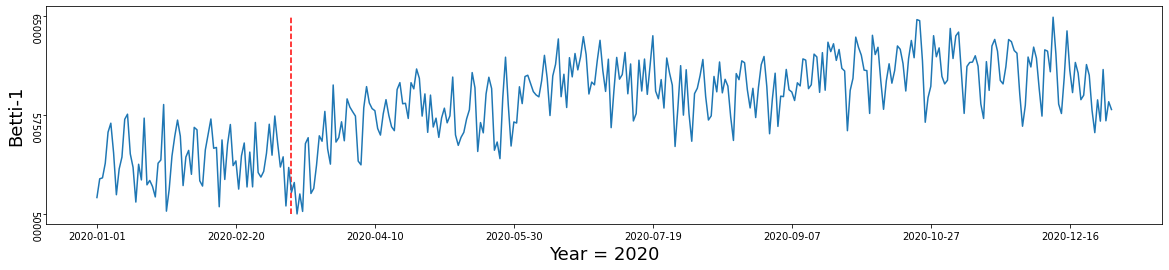

In [228]:

betti_1 = pd.read_csv(betti1_2020_input_path, index_col=0)
betti_1 = betti_1.mean(axis=1)
#print(betti_1)
ax4 = betti_1.plot.line(figsize=(20,4))
ax4.set_ylabel('Betti-1', fontsize = 18)
ax4.set_xlabel('Year = 2020', fontsize = 18)
#plt.yticks(rotation=270)

plt.yticks([50000,57500, 65000],rotation=270)
plt.vlines(70,50000,65000,colors = "r", linestyles = "dashed")

plt.savefig('Betti-1 per day in 2020')

[[ 7175.68]
 [ 6944.33]
 [ 7326.35]
 [ 7347.89]
 [ 7351.57]
 [ 7759.24]
 [ 8165.47]
 [ 8042.65]
 [ 7817.92]
 [ 8184.66]
 [ 8021.49]
 [ 8173.97]
 [ 8105.24]
 [ 8842.42]
 [ 8813.89]
 [ 8722.03]
 [ 8900.34]
 [ 8910.85]
 [ 8703.36]
 [ 8626.47]
 [ 8722.26]
 [ 8658.94]
 [ 8388.11]
 [ 8428.17]
 [ 8327.36]
 [ 8588.42]
 [ 8895.78]
 [ 9385.69]
 [ 9279.81]
 [ 9502.37]
 [ 9333.77]
 [ 9378.09]
 [ 9314.56]
 [ 9284.51]
 [ 9162.14]
 [ 9614.9 ]
 [ 9755.66]
 [ 9807.54]
 [ 9907.12]
 [10162.41]
 [ 9854.79]
 [10275.38]
 [10354.3 ]
 [10242.43]
 [10368.53]
 [ 9904.17]
 [ 9937.67]
 [ 9703.93]
 [10180.65]
 [ 9604.72]
 [ 9606.86]
 [ 9696.58]
 [ 9669.63]
 [ 9989.39]
 [ 9663.75]
 [ 9309.15]
 [ 8785.52]
 [ 8804.72]
 [ 8712.35]
 [ 8531.42]
 [ 8534.17]
 [ 8912.82]
 [ 8754.34]
 [ 8758.9 ]
 [ 9067.39]
 [ 9155.89]
 [ 8898.63]
 [ 8039.38]
 [ 7931.94]
 [ 7885.46]
 [ 7936.65]
 [ 4830.21]
 [ 5609.03]
 [ 5166.26]
 [ 5348.44]
 [ 5026.35]
 [ 5357.61]
 [ 5410.23]
 [ 6195.2 ]
 [ 6226.44]
 [ 6189.85]
 [ 5822.62]
 [ 6502.16]
 [ 6

/root/tools/Python-3.7.7/py37/lib/python3.7/site-packages/sklearn/metrics/cluster/_supervised.py:58: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)


1.0

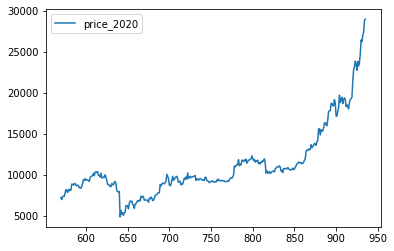

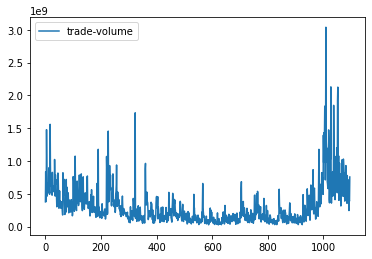

In [36]:
# hot map
# Mutual information

# compare the data between 2017 and 2020
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
occ_2020_input_data = "trade/n-transactions_3y"

price_2020_input_path = "trade/market-price"
total_value_input_path = "trade/trade-volume"

total_tx = pd.read_csv(price_2020_input_path, sep=",")
data_2020_all = total_tx[total_tx['Timestamp'].str.contains("2020")]
data_2020_total_tx = data_2020_all.loc[:, ['market-price']].rename(columns={'market-price': 'price_2020'})
data_2020_total_tx.plot()
data_2020_total_tx = data_2020_total_tx['price_2020'].reset_index(drop=True).values.reshape(-1, 1)

print(data_2020_total_tx)

total_value = pd.read_csv(total_value_input_path, sep=",")
total_value.plot()
total_value = total_value[total_value['Timestamp'].str.contains("2020")]["trade-volume"].reset_index(drop=True).values.reshape(-1, 1)
print(total_value)

mm = MinMaxScaler()
mm_data_2020_total_tx = mm.fit_transform(data_2020_total_tx).flatten()
mm_total_value = mm.fit_transform(total_value).flatten()

print(mm_data_2020_total_tx)
print(mm_total_value)
from sklearn.metrics import normalized_mutual_info_score
normalized_mutual_info_score(mm_data_2020_total_tx, mm_total_value)



In [1]:

import datetime
import math
def getBetweenDay(begin_date, end_date):
    date_list = []
    date_arr = []
    date_unix_list = []
    begin_date = datetime.datetime.strptime(begin_date, "%Y-%m-%d")
    print(type(begin_date))
    print("begin_date:",begin_date)
    # end_date = datetime.datetime.strptime(time.strftime('%Y-%m-%d', time.localtime(time.time())), "%Y-%m-%d")
    end_date = datetime.datetime.strptime(end_date, "%Y-%m-%d")
    print("end_date:",end_date)
    while begin_date <= end_date:
        date_unix = math.trunc(begin_date.replace(tzinfo=datetime.timezone.utc).timestamp()*1000)
        date_unix_list.append(date_unix)
        date_str = begin_date.strftime("%Y-%m-%d")
        date_list.append(date_str)
        date_arr.append([date_str, date_unix])
        begin_date += datetime.timedelta(days=1)  
    return  np.asarray(date_arr)

In [35]:
amoData_mean_total = []
amoData_median_total = []
amoData_sum_total = []
amoData_std_total = []
begin_date = '2020-01-01'
end_date = '2020-12-31'
for date in getBetweenDay(begin_date, end_date):
    amoData = pd.read_csv("/root/study/ChainMT/data/combination/amoData/2020/" + date[0] + ".csv", index_col=0).sort_values(by=['1'])["1"].reset_index(drop=True)
    amoData_mean = amoData.mean()
    amoData_mean_total.append(amoData_mean)
    amoData_median = amoData.median()
    amoData_median_total.append(amoData_median)
    amoData_sum = amoData.sum()
    amoData_sum_total.append(amoData_sum)
    amoData_std = amoData.std()
    amoData_std_total.append(amoData_std)

print(amoData_mean_total,amoData_mean_total)

<class 'datetime.datetime'>
begin_date: 2020-01-01 00:00:00
end_date: 2020-12-31 00:00:00
[174101671.14708936, 235794801.5145565, 319861209.8717292, 230218155.54145247, 194018691.95559666, 366003104.1557727, 230074333.39424133, 281948241.66540694, 374831836.48510575, 273329292.03257626, 190933130.43642318, 176386318.20284098, 235445619.05858386, 361372481.3265426, 479481014.6279269, 272850330.8428573, 343355193.4105814, 175417096.0608919, 222337076.81883833, 311319006.90498203, 212196783.13131198, 272111351.0256548, 263265909.1295698, 217752221.50852263, 171252124.32650763, 220499098.64729586, 548230883.7651124, 302681062.3502554, 259806516.29110023, 438903099.9388638, 359678769.5369397, 266872586.8663631, 238480324.4496882, 481630768.5817195, 290904433.1540943, 230482725.10321218, 500369145.93730867, 494143107.85046023, 241619163.45236853, 179552348.03415984, 351167522.36564016, 279357767.7213081, 318378975.9067562, 313663200.9837076, 324649128.81035423, 265961754.70877105, 333547192.

In [2]:
# input and output degree
import numpy as np
import pandas as pd
amoData_mean_total = []
amoData_median_total = []
amoData_sum_total = []
amoData_std_total = []
amoData_input_degree_total = []
amoData_output_degree_total = []
begin_date = '2020-01-01'
end_date = '2020-12-31'
for date in getBetweenDay(begin_date, end_date):
    amoData = pd.read_csv("/root/study/ChainMT/data/combination/amoData/2020/" + date[0] + ".csv", index_col=0, converters={"0":str}).sort_values(by=['0']).reset_index(drop=True)
    amoData_input = amoData["0"].str[0:2].astype(int)
    amoData_output = amoData["0"].str[2:4].astype(int)
    amoData_input_degree = amoData_input.sum()
    amoData_output_degree = amoData_output.sum()  
    amoData_input_degree_total.append(amoData_input_degree)
    amoData_output_degree_total.append(amoData_output_degree)


print(amoData_input_degree_total)
print(amoData_output_degree_total)

/root/tools/Python-3.7.7/py37/lib/python3.7/site-packages/pandas/compat/__init__.py:97: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


<class 'datetime.datetime'>
begin_date: 2020-01-01 00:00:00
end_date: 2020-12-31 00:00:00
[393666, 507301, 530257, 465042, 465850, 526351, 593046, 548536, 562219, 564354, 495222, 448052, 497050, 624896, 574445, 549378, 551970, 470168, 469205, 528543, 539451, 570977, 566204, 535983, 458559, 417608, 479264, 604515, 572103, 565105, 562585, 491462, 483049, 559393, 539599, 624634, 542220, 576307, 525994, 519763, 505431, 645436, 594496, 610438, 541246, 544748, 469782, 582071, 578915, 585884, 533412, 562832, 486829, 463746, 548611, 554967, 566929, 576754, 612047, 498956, 498354, 580087, 587647, 612662, 599781, 588610, 528349, 498477, 603530, 567547, 489430, 642180, 509101, 519715, 410408, 496675, 521989, 405247, 475659, 504945, 456596, 367708, 462520, 511616, 377347, 545319, 499151, 422975, 402507, 501739, 529565, 525989, 557923, 504061, 454315, 414559, 499728, 561148, 511534, 513789, 507266, 432075, 400034, 510383, 548695, 569482, 575930, 509412, 525545, 454730, 564651, 551208, 482667, 60921

In [40]:
all_features = pd.read_csv("trade/bitcoin_2020_all_features.csv", index_col = 0)
all_features

,meanValue,medianValue,stdValue,sumValue,totaltx,price
2020-01-01,1.741017e+08,1650985.0,4.342914e+13,2.231915e+09,2.860097e+07,7175.68
2020-01-02,2.357948e+08,3051717.0,7.021285e+13,3.588340e+09,6.828297e+07,6944.33
2020-01-03,3.198612e+08,2877000.0,1.010074e+14,1.969864e+10,1.368703e+08,7326.35
2020-01-04,2.302182e+08,2142651.0,6.641495e+13,4.072301e+09,5.018183e+07,7347.89
2020-01-05,1.940187e+08,2000000.0,5.561449e+13,3.419893e+09,4.817756e+07,7351.57
...,...,...,...,...,...,...
2020-12-27,8.039264e+08,2884431.0,2.481375e+14,3.192696e+10,8.222416e+08,26246.58
2020-12-28,6.443142e+08,3058435.0,2.000132e+14,2.228625e+10,5.110589e+08,27036.69
2020-12-29,5.454192e+08,2962340.0,1.826385e+14,1.950288e+10,5.845750e+08,27376.37
2020-12-30,5.203420e+08,3000000.0,1.769392e+14,1.915757e+10,7.510418e+08,28856.59


In [41]:
input_output_degree = pd.DataFrame([amoData_input_degree_total, amoData_output_degree_total]).T
input_output_degree.columns = ["inputDegree", "outputDegree"]
input_output_degree.index = getBetweenDay(begin_date, end_date)[:,0]
input_output_degree

<class 'datetime.datetime'>
begin_date: 2020-01-01 00:00:00
end_date: 2020-12-31 00:00:00


,inputDegree,outputDegree
2020-01-01,393666,562789
2020-01-02,507301,691488
2020-01-03,530257,715906
2020-01-04,465042,652549
2020-01-05,465850,651640
...,...,...
2020-12-27,610570,714874
2020-12-28,595803,735383
2020-12-29,637875,784635
2020-12-30,649113,795516


In [42]:
all_features_new = pd.concat([all_features, input_output_degree],axis=1)
all_features_new

,meanValue,medianValue,stdValue,sumValue,totaltx,price,inputDegree,outputDegree
2020-01-01,1.741017e+08,1650985.0,4.342914e+13,2.231915e+09,2.860097e+07,7175.68,393666,562789
2020-01-02,2.357948e+08,3051717.0,7.021285e+13,3.588340e+09,6.828297e+07,6944.33,507301,691488
2020-01-03,3.198612e+08,2877000.0,1.010074e+14,1.969864e+10,1.368703e+08,7326.35,530257,715906
2020-01-04,2.302182e+08,2142651.0,6.641495e+13,4.072301e+09,5.018183e+07,7347.89,465042,652549
2020-01-05,1.940187e+08,2000000.0,5.561449e+13,3.419893e+09,4.817756e+07,7351.57,465850,651640
...,...,...,...,...,...,...,...,...
2020-12-27,8.039264e+08,2884431.0,2.481375e+14,3.192696e+10,8.222416e+08,26246.58,610570,714874
2020-12-28,6.443142e+08,3058435.0,2.000132e+14,2.228625e+10,5.110589e+08,27036.69,595803,735383
2020-12-29,5.454192e+08,2962340.0,1.826385e+14,1.950288e+10,5.845750e+08,27376.37,637875,784635
2020-12-30,5.203420e+08,3000000.0,1.769392e+14,1.915757e+10,7.510418e+08,28856.59,649113,795516


In [43]:
all_features_new = all_features_new[['meanValue', 'medianValue', 'stdValue', 'sumValue', 'totaltx', 'inputDegree', 'outputDegree', 'price']]
all_features_new

,meanValue,medianValue,stdValue,sumValue,totaltx,inputDegree,outputDegree,price
2020-01-01,1.741017e+08,1650985.0,4.342914e+13,2.231915e+09,2.860097e+07,393666,562789,7175.68
2020-01-02,2.357948e+08,3051717.0,7.021285e+13,3.588340e+09,6.828297e+07,507301,691488,6944.33
2020-01-03,3.198612e+08,2877000.0,1.010074e+14,1.969864e+10,1.368703e+08,530257,715906,7326.35
2020-01-04,2.302182e+08,2142651.0,6.641495e+13,4.072301e+09,5.018183e+07,465042,652549,7347.89
2020-01-05,1.940187e+08,2000000.0,5.561449e+13,3.419893e+09,4.817756e+07,465850,651640,7351.57
...,...,...,...,...,...,...,...,...
2020-12-27,8.039264e+08,2884431.0,2.481375e+14,3.192696e+10,8.222416e+08,610570,714874,26246.58
2020-12-28,6.443142e+08,3058435.0,2.000132e+14,2.228625e+10,5.110589e+08,595803,735383,27036.69
2020-12-29,5.454192e+08,2962340.0,1.826385e+14,1.950288e+10,5.845750e+08,637875,784635,27376.37
2020-12-30,5.203420e+08,3000000.0,1.769392e+14,1.915757e+10,7.510418e+08,649113,795516,28856.59


In [45]:
all_features_new.to_csv("trade/bitcoin_2020_all_features.csv")

<class 'datetime.datetime'>
begin_date: 2020-01-01 00:00:00
end_date: 2020-12-31 00:00:00


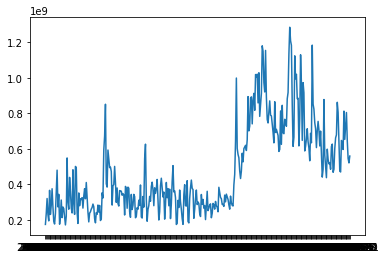

In [308]:
plt.plot(getBetweenDay(begin_date, end_date)[:,0], amoData_mean_total)

<class 'datetime.datetime'>
begin_date: 2020-01-01 00:00:00
end_date: 2020-12-31 00:00:00


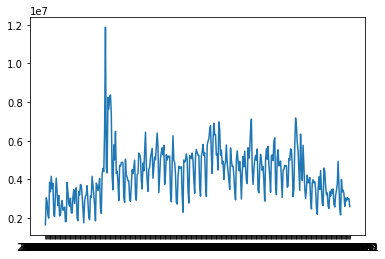

In [309]:
plt.plot(getBetweenDay(begin_date, end_date)[:,0], amoData_median_total)

<class 'datetime.datetime'>
begin_date: 2020-01-01 00:00:00
end_date: 2020-12-31 00:00:00


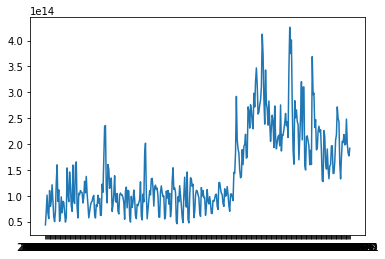

In [317]:
plt.plot(getBetweenDay(begin_date, end_date)[:,0], amoData_sum_total)

<class 'datetime.datetime'>
begin_date: 2020-01-01 00:00:00
end_date: 2020-12-31 00:00:00


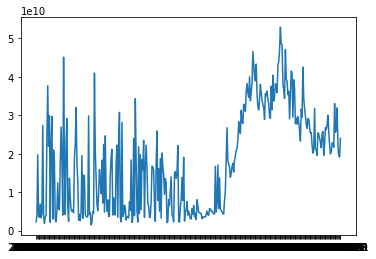

In [318]:
plt.plot(getBetweenDay(begin_date, end_date)[:,0], amoData_std_total)

In [313]:
normalized_mutual_info_score(amoData_mean_total, mm_total_value)


/root/tools/Python-3.7.7/py37/lib/python3.7/site-packages/sklearn/metrics/cluster/_supervised.py:58: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)


5.902633333401367

In [314]:
normalized_mutual_info_score(amoData_median_total, mm_total_value)


/root/tools/Python-3.7.7/py37/lib/python3.7/site-packages/sklearn/metrics/cluster/_supervised.py:58: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)


0.998393185120591

In [319]:
normalized_mutual_info_score(amoData_std_total, mm_total_value)


/root/tools/Python-3.7.7/py37/lib/python3.7/site-packages/sklearn/metrics/cluster/_supervised.py:58: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)


1.0

In [324]:
normalized_mutual_info_score(mm.fit_transform(amoData_sum_total.reshape(-1, 1)).flatten(), mm_total_value)


AttributeError: 'list' object has no attribute 'reshape'

In [322]:
normalized_mutual_info_score(getBetweenDay(begin_date, end_date)[:,0], mm_total_value) 

<class 'datetime.datetime'>
begin_date: 2020-01-01 00:00:00
end_date: 2020-12-31 00:00:00


/root/tools/Python-3.7.7/py37/lib/python3.7/site-packages/sklearn/metrics/cluster/_supervised.py:58: UserWarning: Clustering metrics expects discrete values but received multiclass values for label, and continuous values for target
  warnings.warn(msg, UserWarning)


1.0

In [348]:
mm_total_value

array([0.00000000e+00, 3.45334202e-02, 9.42218004e-02, 1.87808271e-02,
       1.70366044e-02, 7.43280243e-02, 1.58428266e-01, 1.70050093e-01,
       6.93790835e-02, 1.08780723e-01, 4.04687554e-02, 9.37628060e-03,
       3.49570140e-02, 2.55332742e-01, 1.16452386e-01, 7.38520231e-02,
       1.25134887e-01, 3.87276116e-02, 1.24277151e-01, 4.35255136e-02,
       4.48332539e-02, 2.92043688e-02, 9.69803305e-02, 6.52905680e-02,
       1.78425776e-02, 5.39039423e-02, 1.12368477e-01, 1.38347277e-01,
       9.01198228e-02, 1.27447269e-01, 6.80231099e-02, 7.01412555e-03,
       3.28982061e-02, 6.97473649e-02, 5.39978828e-02, 1.17404640e-01,
       1.07489365e-01, 5.16395093e-02, 4.08769902e-02, 6.85918015e-02,
       1.10368530e-01, 1.40549710e-01, 1.16076583e-01, 1.47502092e-01,
       8.18973106e-02, 7.42450370e-02, 4.94766830e-02, 7.87051372e-02,
       9.55451839e-02, 1.37389719e-01, 8.71719655e-02, 4.41820329e-02,
       4.98124395e-03, 3.10518405e-02, 7.63115511e-02, 7.44585438e-02,
      

In [9]:
import pandas as pd
total_tx = pd.read_csv(price_2020_input_path, sep=",")
data_2020_all = total_tx[total_tx['Timestamp'].str.contains("2020")]
data_2020_price = data_2020_all.loc[:, ['market-price']].rename(columns={'market-price': 'price_2020'})
data_2020_price.plot()

print(data_2020_price)

totaltx = pd.read_csv(total_value_input_path, sep=",")
totaltx_2020 = totaltx[totaltx['Timestamp'].str.contains("2020")]
totaltx_2020 = totaltx_2020.loc[:, ['market-price']].rename(columns={'market-price': 'price_2020'})
totaltx.plot()
print(totaltx_2020)

NameError: name 'price_2020_input_path' is not defined

In [37]:
amoData_total = pd.DataFrame([amoData_mean_total,amoData_median_total,amoData_sum_total,amoData_std_total,total_value.flatten(),data_2020_total_tx.flatten()]).T
amoData_total.columns = ["meanValue", "medianValue", "stdValue", "sumValue","totaltx","price"]
amoData_total

,meanValue,medianValue,stdValue,sumValue,totaltx,price
0,1.741017e+08,1650985.0,4.342914e+13,2.231915e+09,2.860097e+07,7175.68
1,2.357948e+08,3051717.0,7.021285e+13,3.588340e+09,6.828297e+07,6944.33
2,3.198612e+08,2877000.0,1.010074e+14,1.969864e+10,1.368703e+08,7326.35
3,2.302182e+08,2142651.0,6.641495e+13,4.072301e+09,5.018183e+07,7347.89
4,1.940187e+08,2000000.0,5.561449e+13,3.419893e+09,4.817756e+07,7351.57
...,...,...,...,...,...,...
361,8.039264e+08,2884431.0,2.481375e+14,3.192696e+10,8.222416e+08,26246.58
362,6.443142e+08,3058435.0,2.000132e+14,2.228625e+10,5.110589e+08,27036.69
363,5.454192e+08,2962340.0,1.826385e+14,1.950288e+10,5.845750e+08,27376.37
364,5.203420e+08,3000000.0,1.769392e+14,1.915757e+10,7.510418e+08,28856.59


In [38]:
amoData_total.index = getBetweenDay(begin_date, end_date)[:,0]

<class 'datetime.datetime'>
begin_date: 2020-01-01 00:00:00
end_date: 2020-12-31 00:00:00


In [39]:
amoData_total.to_csv("trade/bitcoin_2020_all_features.csv")

In [390]:
amoData_total[["meanValue", "medianValue", "stdValue", "sumValue","totaltx","price"]] = mm.fit_transform(amoData_total[["meanValue", "medianValue", "stdValue", "sumValue","totaltx","price"]])
amoData_total

,meanValue,medianValue,stdValue,sumValue,totaltx,price
2020-01-01,0.002561,0.000000,0.000000,0.015107,0.000000,0.097111
2020-01-02,0.058000,0.137081,0.070033,0.041468,0.034533,0.087533
2020-01-03,0.133546,0.119983,0.150553,0.354562,0.094222,0.103350
2020-01-04,0.052989,0.048116,0.060102,0.050874,0.018781,0.104242
2020-01-05,0.020459,0.034156,0.031862,0.038195,0.017037,0.104394
...,...,...,...,...,...,...
2020-12-27,0.568544,0.120710,0.535262,0.592212,0.690669,0.886720
2020-12-28,0.425111,0.137738,0.409429,0.404851,0.419861,0.919434
2020-12-29,0.336240,0.128334,0.363998,0.350758,0.483839,0.933498
2020-12-30,0.313705,0.132020,0.349096,0.344047,0.628707,0.994784


In [391]:
amoData_total.to_csv("trade/bitcoin_2020_all_features.csv")

<AxesSubplot:>

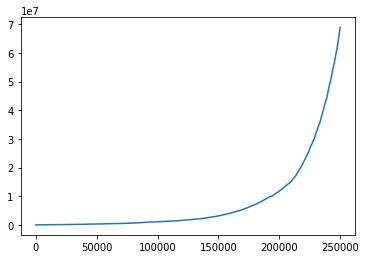

In [290]:
amoData_new[0:250000].plot()

In [288]:
amoData_new[0:280000].median(0)

2438935.5

In [280]:
amoData_new.mean()

235794801.5145565

<AxesSubplot:>

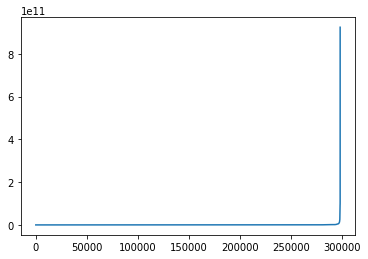

In [287]:
amoData_new.plot()

In [49]:
all_features_new[["meanValue", "medianValue", "stdValue", "sumValue","totaltx","inputDegree","outputDegree","price"]] = mm.fit_transform(all_features_new[["meanValue", "medianValue", "stdValue", "sumValue","totaltx","inputDegree","outputDegree","price"]])
all_features_new

,meanValue,medianValue,stdValue,sumValue,totaltx,inputDegree,outputDegree,price
2020-01-01,0.002561,0.000000,0.000000,0.015107,0.000000,0.075623,0.158156,0.097111
2020-01-02,0.058000,0.137081,0.070033,0.041468,0.034533,0.406672,0.478729,0.087533
2020-01-03,0.133546,0.119983,0.150553,0.354562,0.094222,0.473549,0.539551,0.103350
2020-01-04,0.052989,0.048116,0.060102,0.050874,0.018781,0.283560,0.381737,0.104242
2020-01-05,0.020459,0.034156,0.031862,0.038195,0.017037,0.285914,0.379473,0.104394
...,...,...,...,...,...,...,...,...
2020-12-27,0.568544,0.120710,0.535262,0.592212,0.690669,0.707522,0.536981,0.886720
2020-12-28,0.425111,0.137738,0.409429,0.404851,0.419861,0.664502,0.588066,0.919434
2020-12-29,0.336240,0.128334,0.363998,0.350758,0.483839,0.787069,0.710747,0.933498
2020-12-30,0.313705,0.132020,0.349096,0.344047,0.628707,0.819808,0.737850,0.994784


[[ 1.00000000e+00  7.56115145e-02 -5.71956026e-02 -2.58396898e-02
  -2.07260782e-02 -4.66740970e-02 -2.59918994e-02 -1.56756404e-02
  -7.20010189e-02  1.63479311e-01]
 [ 7.56115145e-02  1.00000000e+00  1.78585789e-01 -8.79458228e-02
  -4.03520405e-02 -6.26281402e-02  3.09075224e-03 -1.42728093e-02
  -3.85937427e-02  4.33336236e-03]
 [-5.71956026e-02  1.78585789e-01  1.00000000e+00 -4.14022874e-02
  -4.38898080e-02  1.39893060e-01  5.58299059e-02 -6.83553016e-02
   1.73501293e-01 -1.60833030e-01]
 [-2.58396898e-02 -8.79458228e-02 -4.14022874e-02  1.00000000e+00
   1.00213581e-01  1.13378774e-01  1.47704171e-02  7.03251243e-02
  -4.58789002e-02  6.44145658e-02]
 [-2.07260782e-02 -4.03520405e-02 -4.38898080e-02  1.00213581e-01
   1.00000000e+00  3.65063039e-02  4.38623409e-02 -1.38174379e-02
  -2.01513161e-02 -7.11647175e-04]
 [-4.66740970e-02 -6.26281402e-02  1.39893060e-01  1.13378774e-01
   3.65063039e-02  1.00000000e+00  7.29989351e-02  6.29290285e-02
  -2.11821299e-02  3.03475990e-02

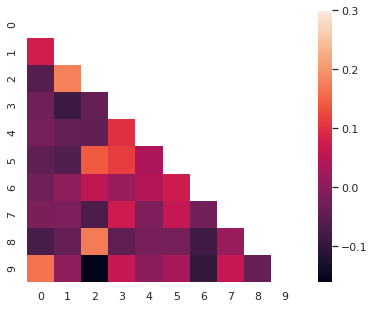

In [5]:
import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set_theme()
import matplotlib.pyplot as plt


corr = np.corrcoef(np.random.randn(10, 200))
print(corr)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(7, 5))
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True)
ax.figure.savefig("features_MI.png")

In [7]:
indep_vars = [ "meanValue", "medianValue", "stdValue", "sumValue","totaltx","inputDegree","outputDegree"] # set independent vars
dep_vars = all_features_new.columns.difference(indep_vars).tolist() # set dependent vars

print(dep_vars)
from sklearn.feature_selection import mutual_info_regression as mi_reg

df_mi = pd.DataFrame([mi_reg(all_features_new[indep_vars], all_features_new[dep_var]) for dep_var in dep_vars], index = dep_vars, columns = indep_vars).apply(lambda x: x / x.max(), axis = 1)

NameError: name 'all_features_new' is not defined

In [13]:
all_features_new

,meanValue,medianValue,stdValue,sumValue,totaltx,inputDegree,outputDegree,price
2020-01-01,1.741017e+08,1650985.0,4.342914e+13,2.231915e+09,2.860097e+07,393666,562789,7175.68
2020-01-02,2.357948e+08,3051717.0,7.021285e+13,3.588340e+09,6.828297e+07,507301,691488,6944.33
2020-01-03,3.198612e+08,2877000.0,1.010074e+14,1.969864e+10,1.368703e+08,530257,715906,7326.35
2020-01-04,2.302182e+08,2142651.0,6.641495e+13,4.072301e+09,5.018183e+07,465042,652549,7347.89
2020-01-05,1.940187e+08,2000000.0,5.561449e+13,3.419893e+09,4.817756e+07,465850,651640,7351.57
...,...,...,...,...,...,...,...,...
2020-12-27,8.039264e+08,2884431.0,2.481375e+14,3.192696e+10,8.222416e+08,610570,714874,26246.58
2020-12-28,6.443142e+08,3058435.0,2.000132e+14,2.228625e+10,5.110589e+08,595803,735383,27036.69
2020-12-29,5.454192e+08,2962340.0,1.826385e+14,1.950288e+10,5.845750e+08,637875,784635,27376.37
2020-12-30,5.203420e+08,3000000.0,1.769392e+14,1.915757e+10,7.510418e+08,649113,795516,28856.59


In [15]:
from sklearn.feature_selection import mutual_info_regression as mi_reg

mi_reg(all_features_new[[ "mean Vol.", "median Vol.", "std Vol.", "sum Vol.","total transaction","input Degree","output Degree"]], all_features_new[[ "meanValue"]])

/root/tools/Python-3.7.7/py37/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


array([4.64514892, 0.18491713, 1.58343794, 1.01230469, 0.1347527 ,
       0.06997423, 0.09496459])

               mean Vol.  median Vol.      std Vol.      sum Vol.  \
2020-01-01  1.741017e+08    1650985.0  4.342914e+13  2.231915e+09   
2020-01-02  2.357948e+08    3051717.0  7.021285e+13  3.588340e+09   
2020-01-03  3.198612e+08    2877000.0  1.010074e+14  1.969864e+10   
2020-01-04  2.302182e+08    2142651.0  6.641495e+13  4.072301e+09   
2020-01-05  1.940187e+08    2000000.0  5.561449e+13  3.419893e+09   
...                  ...          ...           ...           ...   
2020-12-27  8.039264e+08    2884431.0  2.481375e+14  3.192696e+10   
2020-12-28  6.443142e+08    3058435.0  2.000132e+14  2.228625e+10   
2020-12-29  5.454192e+08    2962340.0  1.826385e+14  1.950288e+10   
2020-12-30  5.203420e+08    3000000.0  1.769392e+14  1.915757e+10   
2020-12-31  5.588231e+08    2597633.0  1.917618e+14  2.399013e+10   

            total transaction  input Degree  output Degree     price  
2020-01-01       2.860097e+07        393666         562789   7175.68  
2020-01-02       6.828297e+07

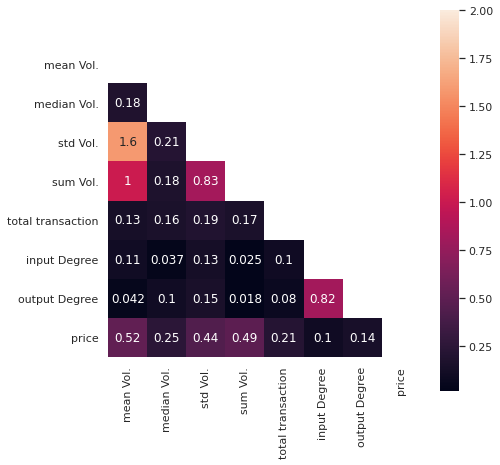

In [101]:
from sklearn.feature_selection import mutual_info_regression

all_features_new = pd.read_csv("trade/bitcoin_2020_all_features.csv", index_col=0)
all_features_new.columns=[ "mean Vol.", "median Vol.", "std Vol.", "sum Vol.","total transaction","input Degree","output Degree","price"]
print(all_features_new)
MI_total = np.zeros((8,8))
i = 0

for col_1 in all_features_new.columns:
    j = 0
    for col_2 in all_features_new.columns:
        MI_total[i,j] = mutual_info_regression(all_features_new[[col_1]],all_features_new[col_2])
        j = j + 1
    i = i + 1

mask = np.zeros_like(MI_total)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(7, 7))
    ax = sns.heatmap(MI_total, mask=mask, annot=True, vmax=2, square=True,xticklabels=all_features_new.columns.to_list(), yticklabels=all_features_new.columns.to_list())
ax.figure.savefig("blockchain_features_MI.png", bbox_inches = "tight")


In [1]:
import pandas as pd
bitcoin_data = pd.read_csv("trade/Bitcoin Historical Data - Investing.com.csv", thousands=',')
bitcoin_price = bitcoin_data[bitcoin_data["Date"].str.contains("2020")]["Open"].reset_index(drop=True)

eth_data = pd.read_csv("trade/Ethereum Historical Data - Investing.com.csv")
eth_price = eth_data[eth_data["Date"].str.contains("2020")]["Open"].reset_index(drop=True)
eth_price.columns = ["eth"]

lite_data = pd.read_csv("trade/Litecoin Historical Data.csv")
lite_price = lite_data[lite_data["Date"].str.contains("2020")]["Open"].reset_index(drop=True)
lite_price.columns=["lite"]

xrp_data = pd.read_csv("trade/XRP Historical Data.csv")
xrp_price = xrp_data[xrp_data["Date"].str.contains("2020")]["Open"].reset_index(drop=True)
xrp_price.columns=["xrp"]

doge_data = pd.read_csv("trade/Dogecoin Historical Data.csv")
doge_price = doge_data[doge_data["Date"].str.contains("2020")]["Open"].reset_index(drop=True)
doge_price.columns=["doge"]

tether_data = pd.read_csv("trade/USDT_USD Kraken Historical Data.csv")
tether_price = tether_data[tether_data["Date"].str.contains("2020")]["Open"].reset_index(drop=True)
tether_price.columns=["doge"]

bnb_data = pd.read_csv("trade/BNB_USD Binance Historical Data.csv")
bnb_price = bnb_data[bnb_data["Date"].str.contains("2020")]["Open"].reset_index(drop=True)
bnb_price.columns=["doge"]

cardano_data = pd.read_csv("trade/Cardano Historical Data.csv")
cardano_price = cardano_data[cardano_data["Date"].str.contains("2020")]["Open"].reset_index(drop=True)
cardano_price.columns=["doge"]

total_coins = pd.DataFrame([bitcoin_price, eth_price, lite_price, xrp_price, doge_price, tether_price, bnb_price, cardano_price]).T
total_coins.columns = ["BTC", "ETH", " LTC", "XRP", "DOGE", "USDT", "BNB", "ADA"]
total_coins.to_csv("trade/all_coins_price.csv")
print(total_coins)


/root/tools/Python-3.7.7/py37/lib/python3.7/site-packages/pandas/compat/__init__.py:97: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


         BTC     ETH      LTC      XRP      DOGE    USDT    BNB       ADA
0     7196.4  129.21   41.288  0.19293  0.002015  0.9963  13.71  0.032827
1     7199.7  130.75   41.627  0.19306   0.00204   0.997  13.71  0.033468
2     6967.1  127.19   39.558  0.18749  0.001999   0.997  13.01  0.032685
3     7345.1  134.30   42.183  0.19321  0.002042  0.9984  13.64  0.034115
4     7376.8  134.32   42.855  0.19313  0.002307  0.9979   13.8  0.034366
..       ...     ...      ...      ...       ...     ...    ...       ...
361  26460.3  636.35  129.657  0.29463  0.004511  0.9992   33.6  0.158324
362  26259.2  683.76   127.88  0.28394  0.004549  0.9987  33.64  0.154642
363  27065.3  730.26  129.829  0.24923  0.004594  0.9982  35.97  0.176434
364  27374.5  732.04  128.798  0.22152  0.004488  0.9991  39.13  0.191005
365  28866.8  751.92  130.088   0.2113  0.004626  1.0005  38.17  0.184036

[366 rows x 8 columns]


         BTC     ETH      LTC      XRP      DOGE    USDT    BNB       ADA
0     7196.4  129.21   41.288  0.19293  0.002015  0.9963  13.71  0.032827
1     7199.7  130.75   41.627  0.19306  0.002040  0.9970  13.71  0.033468
2     6967.1  127.19   39.558  0.18749  0.001999  0.9970  13.01  0.032685
3     7345.1  134.30   42.183  0.19321  0.002042  0.9984  13.64  0.034115
4     7376.8  134.32   42.855  0.19313  0.002307  0.9979  13.80  0.034366
..       ...     ...      ...      ...       ...     ...    ...       ...
361  26460.3  636.35  129.657  0.29463  0.004511  0.9992  33.60  0.158324
362  26259.2  683.76  127.880  0.28394  0.004549  0.9987  33.64  0.154642
363  27065.3  730.26  129.829  0.24923  0.004594  0.9982  35.97  0.176434
364  27374.5  732.04  128.798  0.22152  0.004488  0.9991  39.13  0.191005
365  28866.8  751.92  130.088  0.21130  0.004626  1.0005  38.17  0.184036

[366 rows x 8 columns]


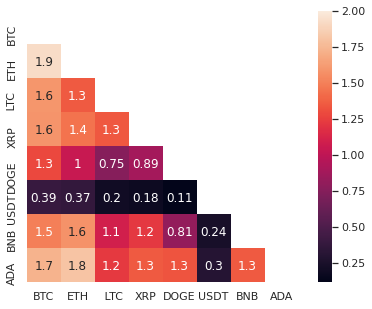

In [83]:
from sklearn.feature_selection import mutual_info_regression

all_features_new = pd.read_csv("trade/all_coins_price.csv", index_col=0,converters={"bitcoin":float})
print(all_features_new)
MI_total = np.zeros((8,8))
i = 0

for col_1 in all_features_new.columns:
    j = 0
    for col_2 in all_features_new.columns:
        MI_total[i,j] = mutual_info_regression(all_features_new[[col_1]],all_features_new[col_2])
        j = j + 1
    i = i + 1

mask = np.zeros_like(MI_total)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(7, 5))
    ax = sns.heatmap(MI_total, mask=mask, annot=True, vmax=2, square=True,xticklabels=all_features_new.columns.to_list(), yticklabels=all_features_new.columns.to_list())
ax.figure.savefig("all_coins_MI.png")


In [92]:
bitcoin_data = pd.read_csv("trade/Bitcoin Historical Data - Investing.com.csv", thousands=',')
bitcoin_price = bitcoin_data[bitcoin_data["Date"].str.contains("2020")]["Open"].reset_index(drop=True)

bitcoin_vol = bitcoin_data[bitcoin_data["Date"].str.contains("2020")]["Vol."].reset_index(drop=True)
bitcoin_vol = (bitcoin_vol.replace(r'[KMB]+$', '', regex=True).astype(float) * bitcoin_vol.str.extract(r'[\d\.]+([KMB]+)', expand=False).fillna(1).replace(['K','M', 'B'], [10**3, 10**6, 10**9]).astype(int))

eth_data = pd.read_csv("trade/Ethereum Historical Data - Investing.com.csv")
eth_price = eth_data[eth_data["Date"].str.contains("2020")]["Vol."].reset_index(drop=True)
eth_price = (eth_price.replace(r'[KMB]+$', '', regex=True).astype(float) * eth_price.str.extract(r'[\d\.]+([KMB]+)', expand=False).fillna(1).replace(['K','M', 'B'], [10**3, 10**6, 10**9]).astype(int))

lite_data = pd.read_csv("trade/Litecoin Historical Data.csv")
lite_price = lite_data[lite_data["Date"].str.contains("2020")]["Vol."].reset_index(drop=True)
lite_price = (lite_price.replace(r'[KMB]+$', '', regex=True).astype(float) * lite_price.str.extract(r'[\d\.]+([KMB]+)', expand=False).fillna(1).replace(['K','M', 'B'], [10**3, 10**6, 10**9]).astype(int))

xrp_data = pd.read_csv("trade/XRP Historical Data.csv")
xrp_price = xrp_data[xrp_data["Date"].str.contains("2020")]["Vol."].reset_index(drop=True)
xrp_price = (xrp_price.replace(r'[KMB]+$', '', regex=True).astype(float) * xrp_price.str.extract(r'[\d\.]+([KMB]+)', expand=False).fillna(1).replace(['K','M', 'B'], [10**3, 10**6, 10**9]).astype(int))

doge_data = pd.read_csv("trade/Dogecoin Historical Data.csv")
doge_price = doge_data[doge_data["Date"].str.contains("2020")]["Vol."].reset_index(drop=True)
doge_price = (doge_price.replace(r'[KMB]+$', '', regex=True).astype(float) * doge_price.str.extract(r'[\d\.]+([KMB]+)', expand=False).fillna(1).replace(['K','M', 'B'], [10**3, 10**6, 10**9]).astype(int))

tether_data = pd.read_csv("trade/USDT_USD Kraken Historical Data.csv")
tether_price = tether_data[tether_data["Date"].str.contains("2020")]["Vol."].reset_index(drop=True)
print("tether_price:",tether_price)
tether_price = (tether_price.replace(r'[KMB]+$', '', regex=True).replace(r'[-]+$', '0', regex=True).astype(float) * tether_price.str.extract(r'[\d\.]+([KMB]+)', expand=False).fillna(1).replace(['K','M', 'B'], [10**3, 10**6, 10**9]).astype(int))

bnb_data = pd.read_csv("trade/BNB_USD Binance Historical Data.csv")
bnb_price = bnb_data[bnb_data["Date"].str.contains("2020")]["Vol."].reset_index(drop=True)
bnb_price = (bnb_price.replace(r'[KMB]+$', '', regex=True).astype(float) * bnb_price.str.extract(r'[\d\.]+([KMB]+)', expand=False).fillna(1).replace(['K','M', 'B'], [10**3, 10**6, 10**9]).astype(int))

cardano_data = pd.read_csv("trade/Cardano Historical Data.csv")
cardano_price = cardano_data[cardano_data["Date"].str.contains("2020")]["Vol."].reset_index(drop=True)
cardano_price = (cardano_price.replace(r'[KMB]+$', '', regex=True).astype(float) * cardano_price.str.extract(r'[\d\.]+([KMB]+)', expand=False).fillna(1).replace(['K','M', 'B'], [10**3, 10**6, 10**9]).astype(int))

sum_data = pd.read_csv("trade/Cardano Historical Data.csv")
cardano_price = cardano_data[cardano_data["Date"].str.contains("2020")]["Vol."].reset_index(drop=True)
cardano_price = (cardano_price.replace(r'[KMB]+$', '', regex=True).astype(float) * cardano_price.str.extract(r'[\d\.]+([KMB]+)', expand=False).fillna(1).replace(['K','M', 'B'], [10**3, 10**6, 10**9]).astype(int))


total_coins = pd.DataFrame([bitcoin_price, eth_price, lite_price, xrp_price, doge_price, tether_price, bnb_price, cardano_price, bitcoin_vol]).T
total_coins.columns = ["BTC Price", "ETH Vol.", " LTC Vol.", "XRP Vol.", "DOGE Vol.", "USDT Vol.", "BNB Vol.", "ADA Vol.", "BTC Vol."]
total_coins["total Vol."] = total_coins[["ETH Vol.", " LTC Vol.", "XRP Vol.", "DOGE Vol.", "USDT Vol.", "BNB Vol.", "ADA Vol.", "BTC Vol."]].sum(axis=1)

total_coins.to_csv("trade/all_coins_vol.csv")
print(total_coins)


tether_price: 0      262.41K
1      862.22K
2        1.99M
3      718.00K
4      806.22K
        ...   
361     36.94M
362     48.51M
363     58.70M
364     56.51M
365     68.15M
Name: Vol., Length: 366, dtype: object
     BTC Price    ETH Vol.     LTC Vol.      XRP Vol.     DOGE Vol.  \
0       7196.4  10350000.0    5440000.0  1.230000e+09  1.440000e+09   
1       7199.7  11450000.0    5600000.0  1.470000e+09  1.860000e+09   
2       6967.1  15670000.0    7140000.0  1.740000e+09  1.690000e+09   
3       7345.1  11160000.0    6350000.0  1.110000e+09  1.550000e+09   
4       7376.8  12190000.0    7150000.0  1.150000e+09  1.570000e+09   
..         ...         ...          ...           ...           ...   
361    26460.3   2310000.0  367210000.0  2.810000e+09  5.620000e+09   
362    26259.2   2750000.0  311090000.0  2.760000e+09  3.590000e+09   
363    27065.3   1820000.0  288180000.0  7.620000e+09  3.420000e+09   
364    27374.5   1860000.0  275550000.0  4.720000e+09  3.430000e+09   
3

In [90]:
total_coins["total Vol."] = total_coins[["ETH Vol.", " LTC Vol.", "XRP Vol.", "DOGE Vol.", "USDT Vol.", "BNB Vol.", "ADA Vol.", "BTC Vol."]].sum(axis=1)
total_coins

,BTC Price,ETH Vol.,LTC Vol.,XRP Vol.,DOGE Vol.,USDT Vol.,BNB Vol.,ADA Vol.,BTC Vol.,total Vol.
0,7196.4,10350000.0,5440000.0,1.230000e+09,1.440000e+09,262410.0,939310.0,2.508600e+08,420280.0,2.938272e+09
1,7199.7,11450000.0,5600000.0,1.470000e+09,1.860000e+09,862220.0,971730.0,2.166300e+08,632780.0,3.566147e+09
2,6967.1,15670000.0,7140000.0,1.740000e+09,1.690000e+09,1990000.0,1460000.0,3.415900e+08,936290.0,3.798786e+09
3,7345.1,11160000.0,6350000.0,1.110000e+09,1.550000e+09,718000.0,1230000.0,3.582000e+08,523910.0,3.038182e+09
4,7376.8,12190000.0,7150000.0,1.150000e+09,1.570000e+09,806220.0,1460000.0,2.167100e+08,628140.0,2.958944e+09
...,...,...,...,...,...,...,...,...,...,...
361,26460.3,2310000.0,367210000.0,2.810000e+09,5.620000e+09,36940000.0,3750000.0,1.180000e+09,231230.0,1.002044e+10
362,26259.2,2750000.0,311090000.0,2.760000e+09,3.590000e+09,48510000.0,4120000.0,1.290000e+09,126980.0,8.006597e+09
363,27065.3,1820000.0,288180000.0,7.620000e+09,3.420000e+09,58700000.0,7020000.0,2.110000e+09,119570.0,1.350584e+10
364,27374.5,1860000.0,275550000.0,4.720000e+09,3.430000e+09,56510000.0,2420000.0,1.180000e+09,159820.0,9.666500e+09


     BTC Price    ETH Vol.     LTC Vol.      XRP Vol.     DOGE Vol.  \
0       7196.4  10350000.0    5440000.0  1.230000e+09  1.440000e+09   
1       7199.7  11450000.0    5600000.0  1.470000e+09  1.860000e+09   
2       6967.1  15670000.0    7140000.0  1.740000e+09  1.690000e+09   
3       7345.1  11160000.0    6350000.0  1.110000e+09  1.550000e+09   
4       7376.8  12190000.0    7150000.0  1.150000e+09  1.570000e+09   
..         ...         ...          ...           ...           ...   
361    26460.3   2310000.0  367210000.0  2.810000e+09  5.620000e+09   
362    26259.2   2750000.0  311090000.0  2.760000e+09  3.590000e+09   
363    27065.3   1820000.0  288180000.0  7.620000e+09  3.420000e+09   
364    27374.5   1860000.0  275550000.0  4.720000e+09  3.430000e+09   
365    28866.8   1040000.0  232210000.0  2.810000e+09  3.050000e+09   

      USDT Vol.   BNB Vol.      ADA Vol.  BTC Vol.    total Vol.  
0      262410.0   939310.0  2.508600e+08  420280.0  2.938272e+09  
1      862220

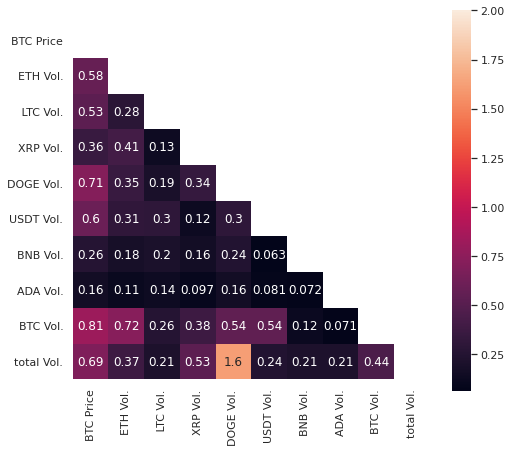

In [103]:
from sklearn.feature_selection import mutual_info_regression

all_features_new = pd.read_csv("trade/all_coins_price.csv", index_col=0,converters={"bitcoin":float})
print(all_features_new)
MI_total = np.zeros((10,10))
i = 0

for col_1 in all_features_new.columns:
    j = 0
    for col_2 in all_features_new.columns:
        MI_total[i,j] = mutual_info_regression(all_features_new[[col_1]],all_features_new[col_2])
        j = j + 1
    i = i + 1

mask = np.zeros_like(MI_total)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(8, 7))
    ax = sns.heatmap(MI_total, mask=mask, annot=True, vmax=2, square=True,xticklabels=all_features_new.columns.to_list(), yticklabels=all_features_new.columns.to_list())
ax.figure.savefig("all_coins_Vol_MI.png")


In [67]:
df_mi

,meanValue,medianValue,stdValue,sumValue,totaltx,inputDegree,outputDegree
price,1.0,0.472458,0.850144,0.943696,0.409464,0.19554,0.277578


In [59]:
np.random.randn(10, 200)

array([[ 2.04253623, -0.91946118,  0.11467003, ..., -0.36931936,
        -0.64838337,  0.18607203],
       [ 0.04471005, -0.69267338,  1.49398053, ...,  0.34265399,
        -0.09796724, -0.24024461],
       [-0.09630367, -2.19438644,  0.69427617, ..., -0.72658351,
         0.97519586, -1.28478751],
       ...,
       [ 1.89131806,  0.42734385, -1.32859472, ..., -1.10447736,
        -0.02584448, -0.68469474],
       [ 0.74302884,  0.09277353, -1.81083279, ..., -1.50085296,
        -2.92733372,  0.66073992],
       [ 0.13274779,  0.59372392,  0.11254631, ..., -0.20273458,
        -0.25786648,  0.07081452]])

In [60]:
np.zeros_like(corr)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

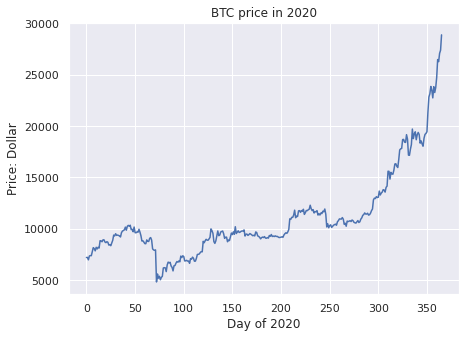

In [123]:
fig = plt.figure(figsize=(7, 5))

all_features_new = pd.read_csv("trade/all_coins_price.csv", index_col=0,converters={"bitcoin":float})
all_features_new["BTC Price"].plot()
plt.title("BTC price in 2020")
plt.xlabel("Day of 2020")
plt.ylabel("Price: Dollar")


fig.savefig("BTC price in 2020.png", dpi=150)